The goal here is to get songs that were popular in different time intervals and:

1. check what feature was most correlated with popularity at that interval

2. given the popularity of a song, if the features that correlate with it correlate with the year, if a popular song is given, can we predict the year it was released given the features that make it popular

3. see if over time there was an increase for example, if there was an increase in danceability over time in the popular songs or if it remained the same throughout the years.

Here a popular song is defined as having a score greater than 50

C:\Users\user\AppData\Local\Temp\ipykernel_18956\57834802.py:13: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  popularity_corr[f"{i} - {i+5}"] = new_interval.corr()['popularity']
C:\Users\user\AppData\Local\Temp\ipykernel_18956\57834802.py:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_scores = new_interval.corr()


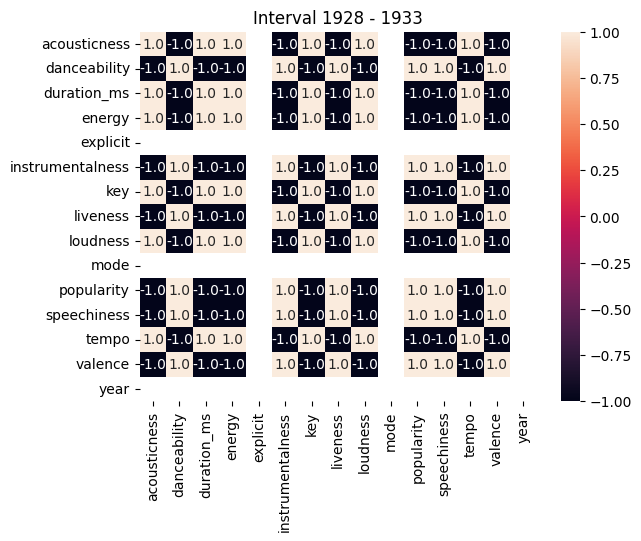

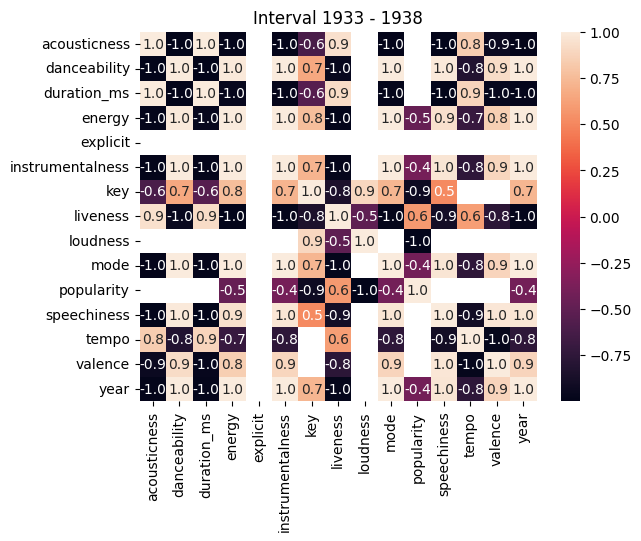

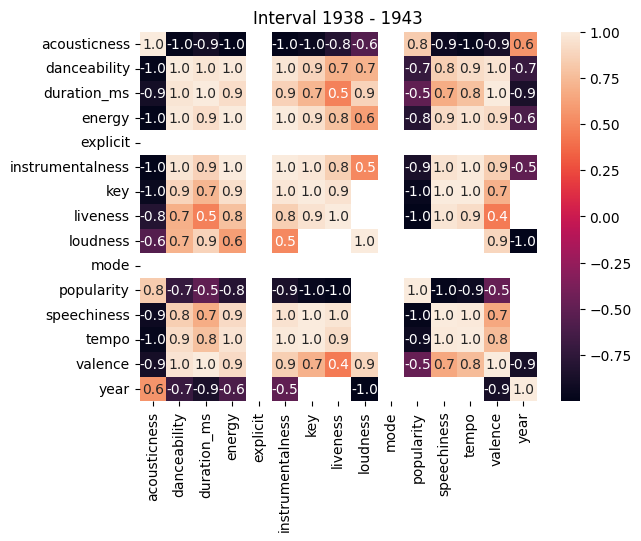

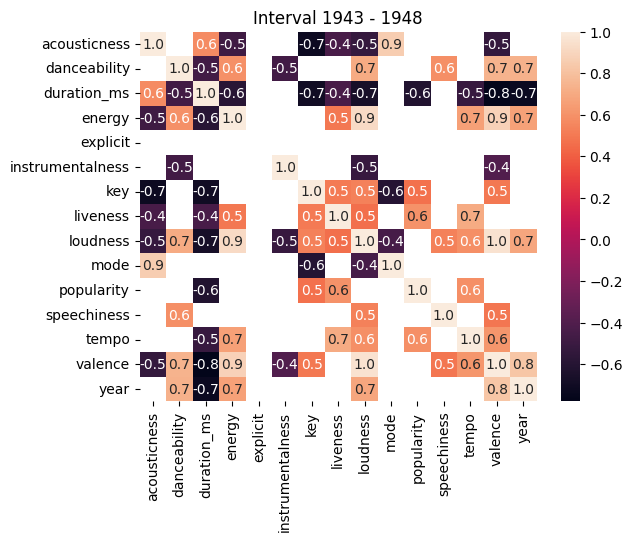

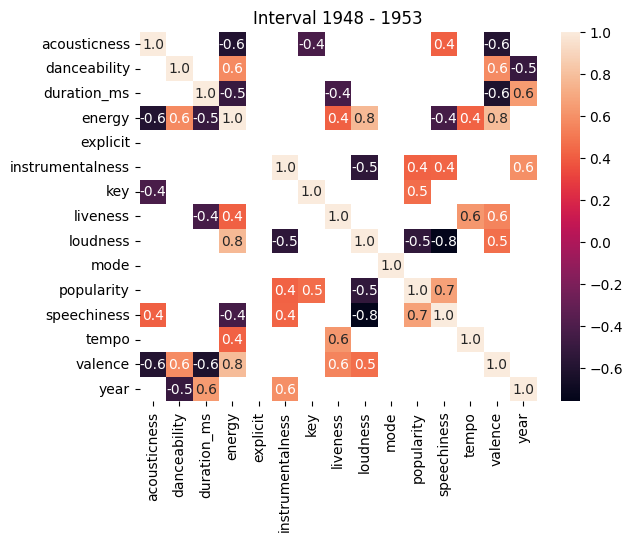

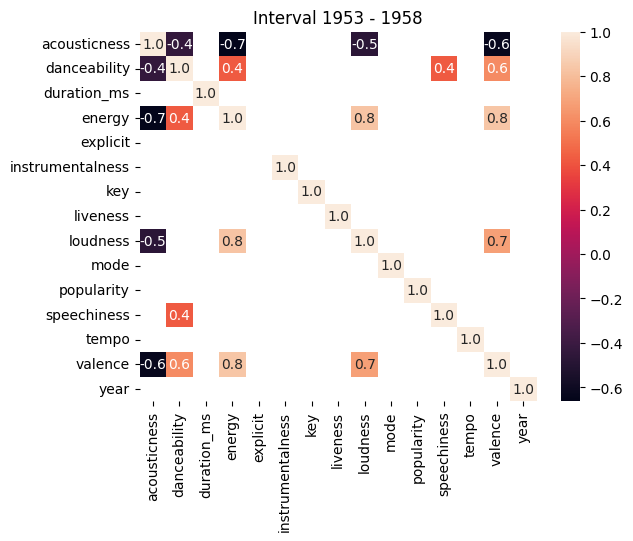

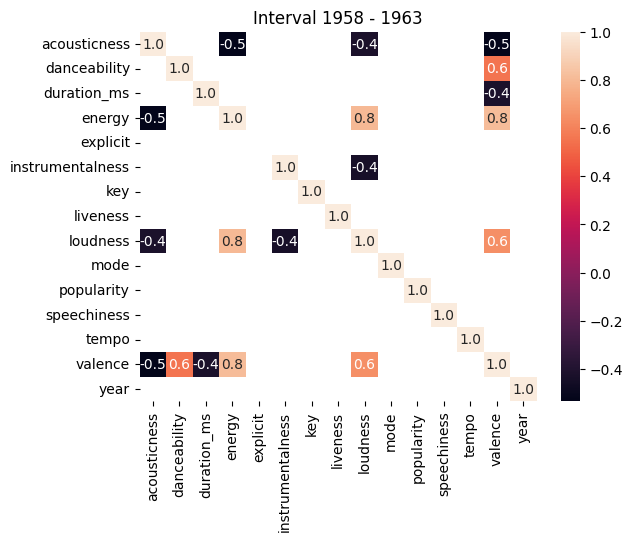

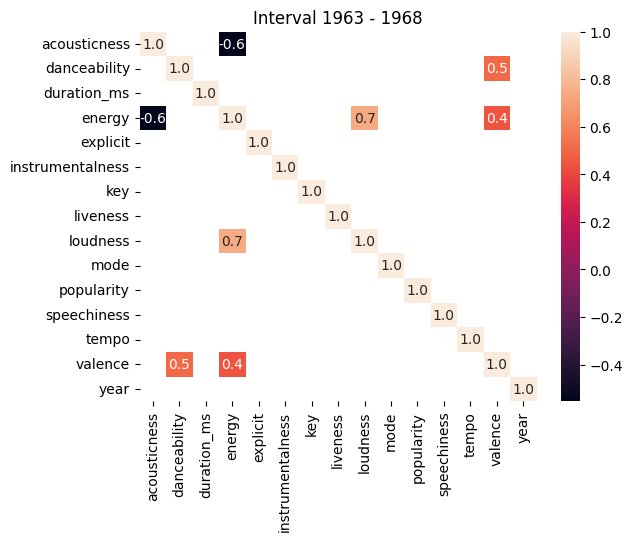

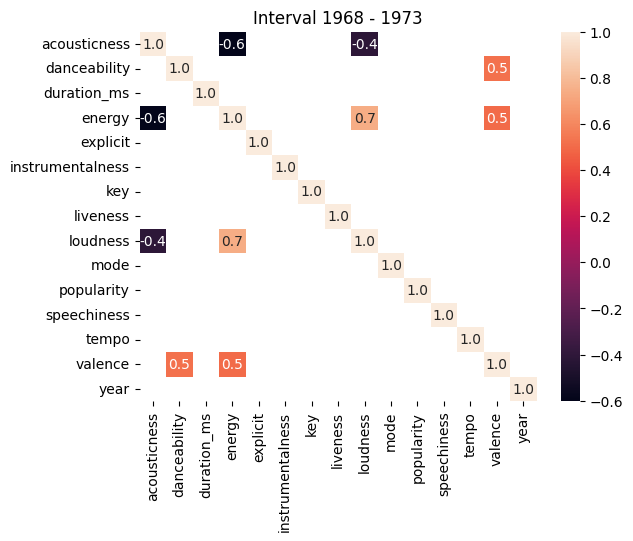

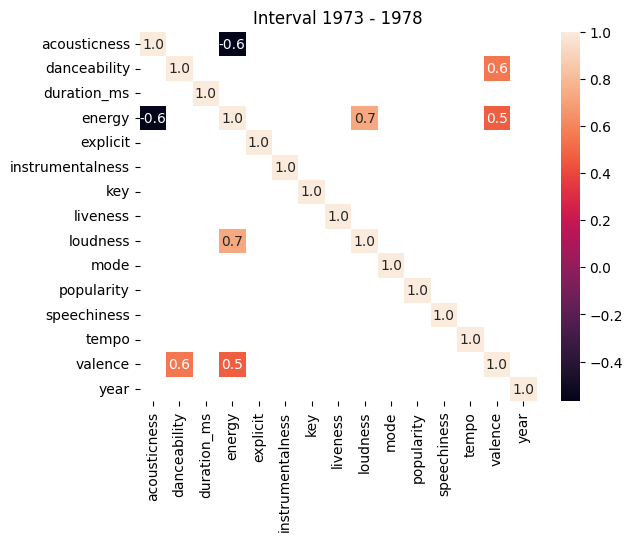

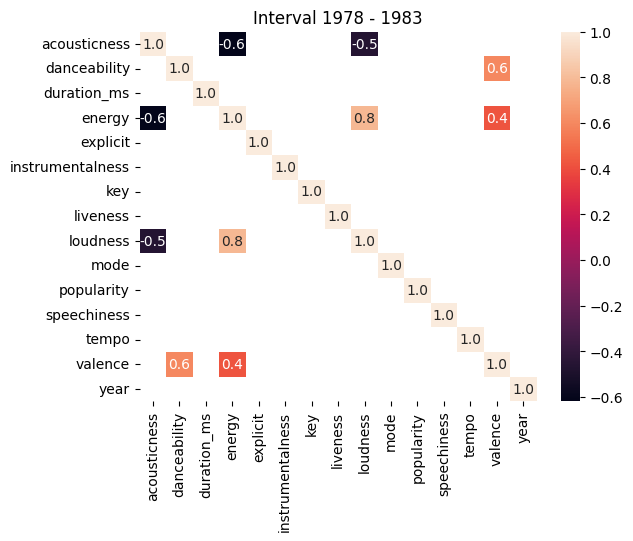

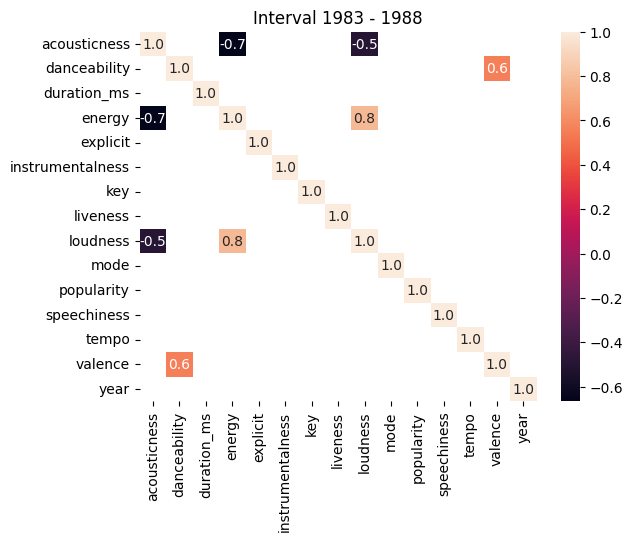

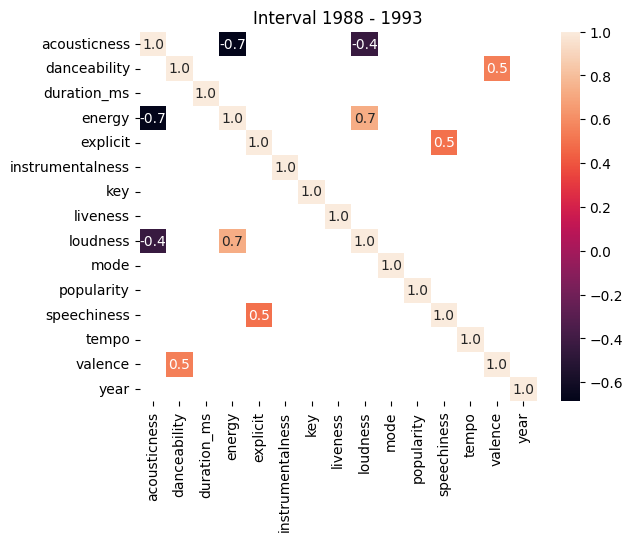

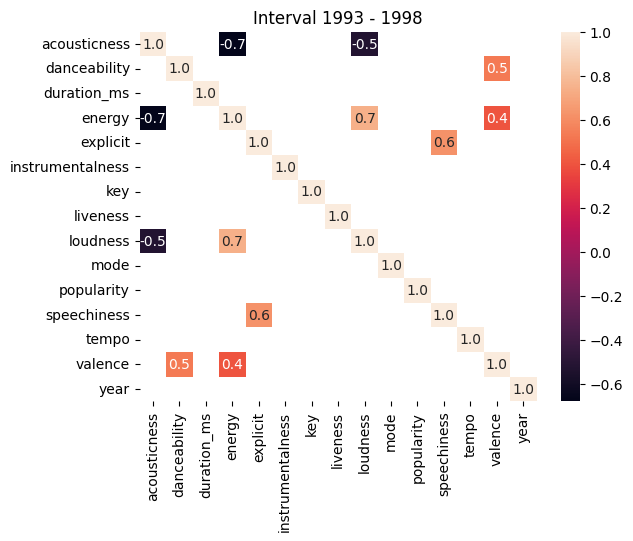

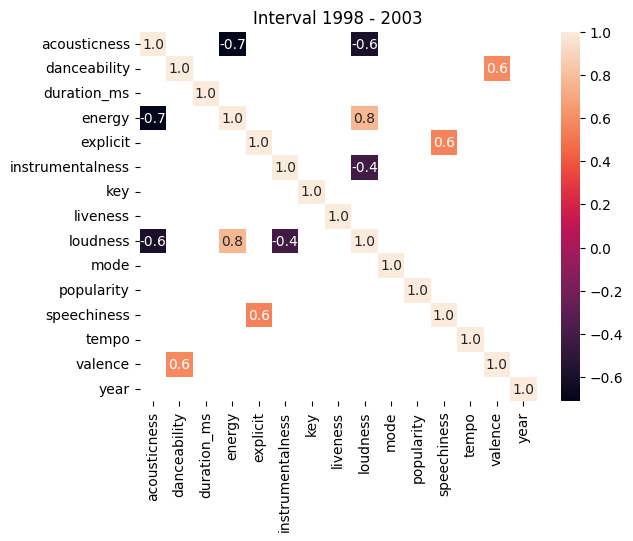

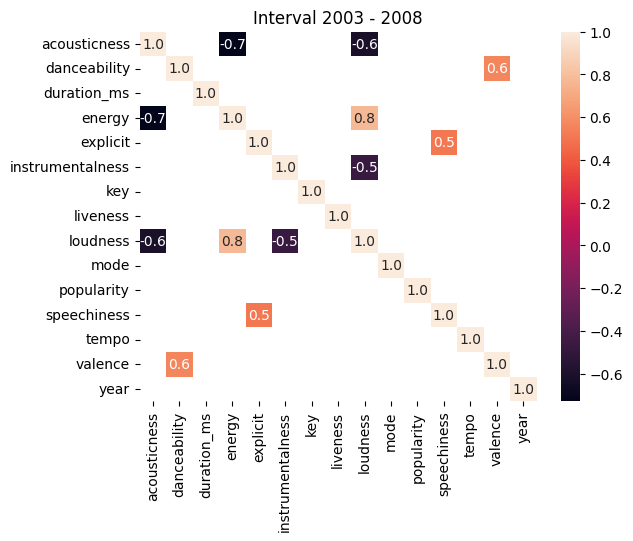

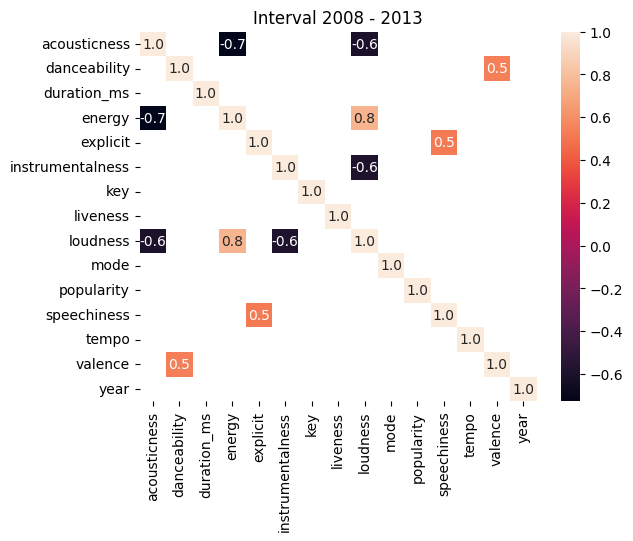

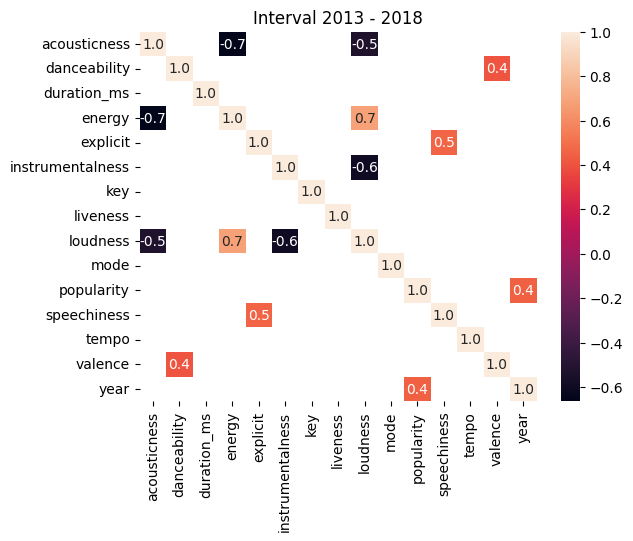

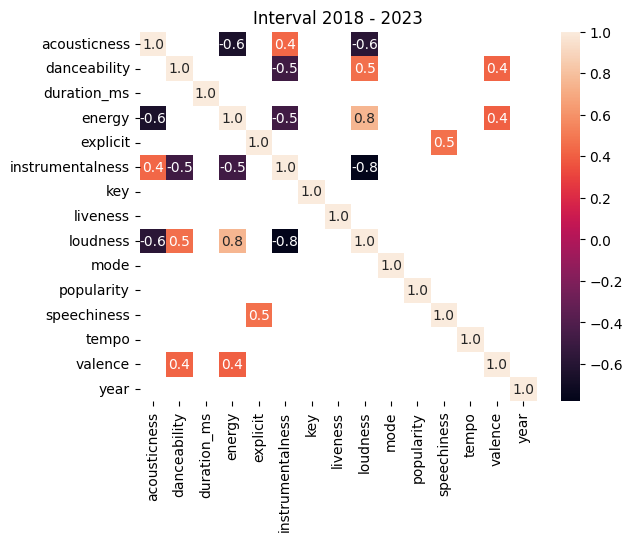

In [8]:
# ! pip install pandas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('spotify_data.csv')

X = df['year']
popularity_corr = {}
for i in range(1928, 2020, 5):
    new_interval = df[(X.between(i, i + 5)) & (df['popularity'] > 50)]
    
    popularity_corr[f"{i} - {i+5}"] = new_interval.corr()['popularity']

    correlation_scores = new_interval.corr()
    correlation_scores = correlation_scores[(correlation_scores.iloc[:, 0: 19] >= 0.4) | (correlation_scores.iloc[:, 0: 19] <= -0.4)]
    plt.figure(i)
    plt.title(f'Interval {i} - {i+5}')
    sns.heatmap(correlation_scores, annot=True, fmt=".1f")
    


From the first results above, we see that intervals after 1950don't have any feature correlated with popularity. Let's see if that changes when we increase the interval to 10 year intervals.

C:\Users\user\AppData\Local\Temp\ipykernel_18956\2477414231.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  popularity_corr[f"{i} - {i+10}"] = new_interval.corr()['popularity']
C:\Users\user\AppData\Local\Temp\ipykernel_18956\2477414231.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_scores = new_interval.corr()


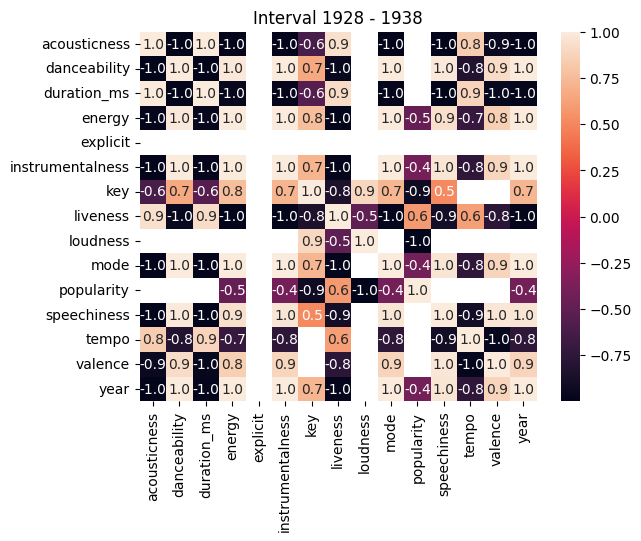

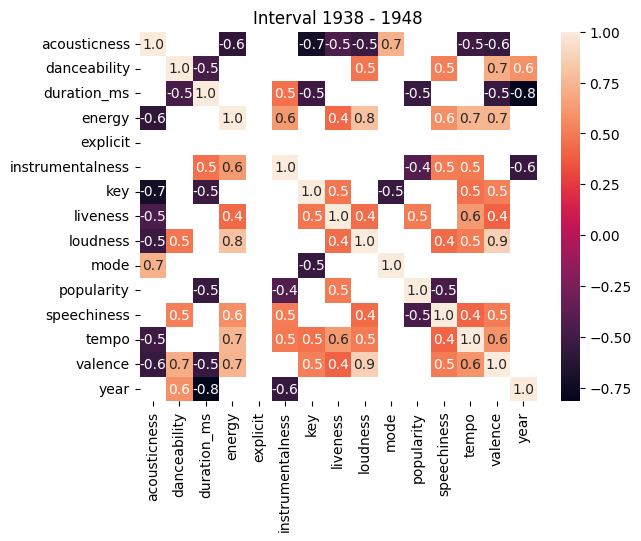

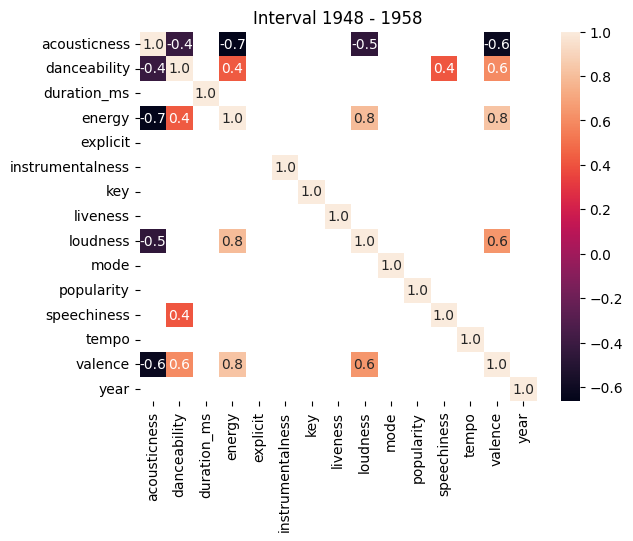

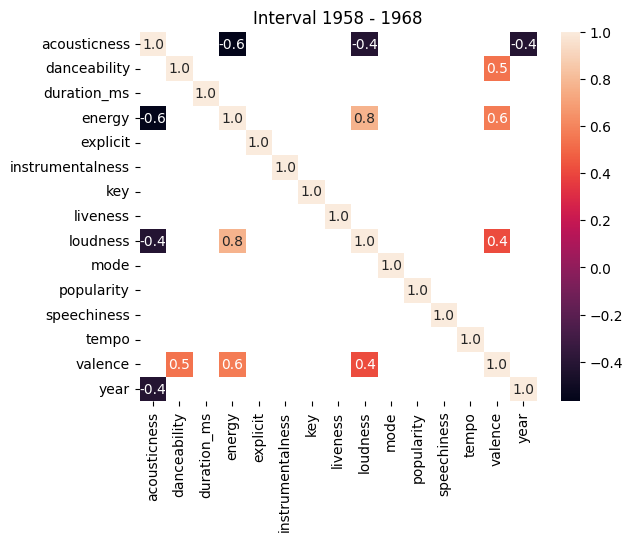

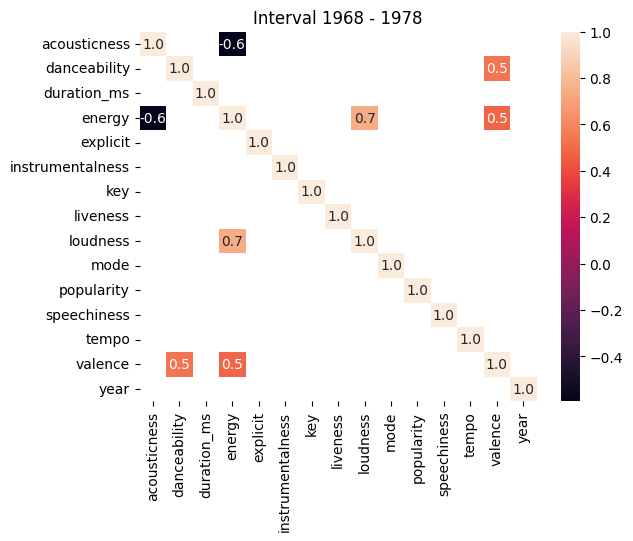

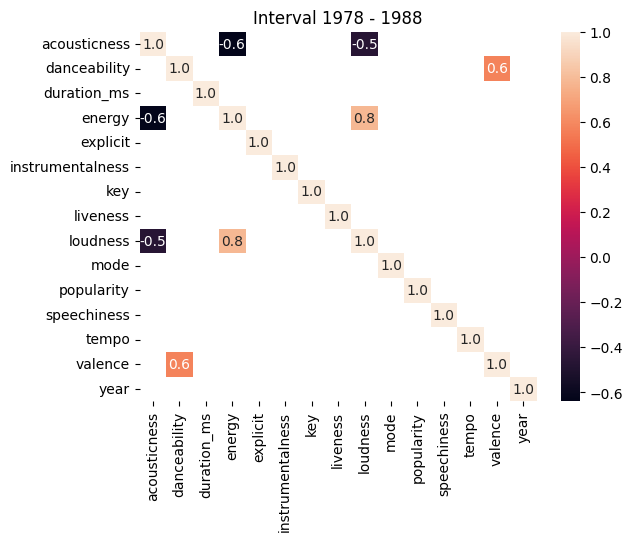

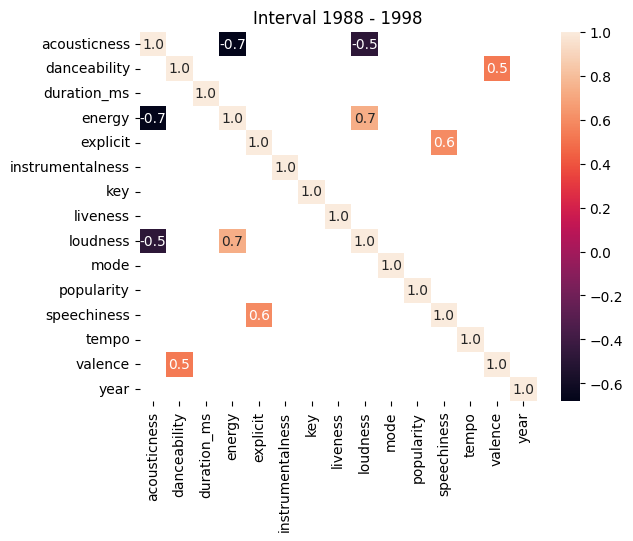

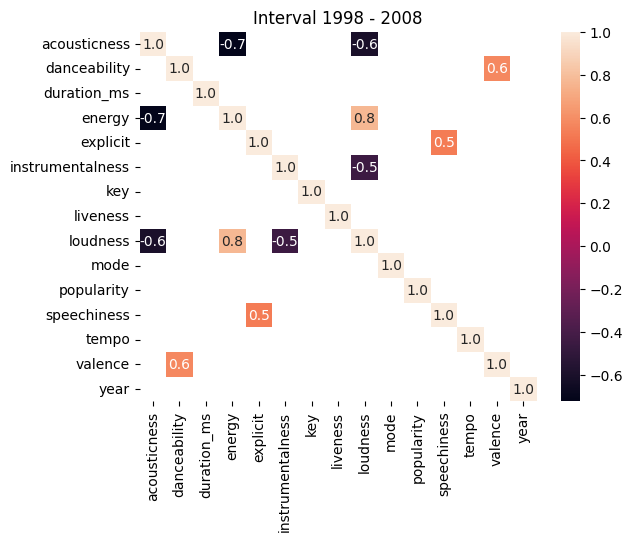

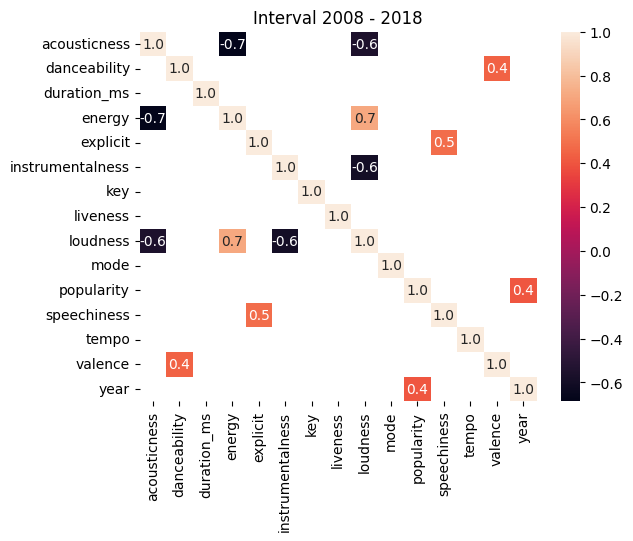

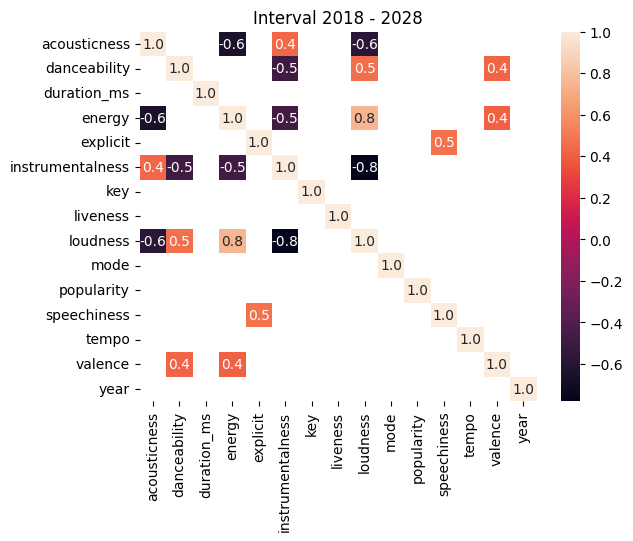

In [9]:
popularity_corr = {}

for i in range(1928, 2020, 10):
    new_interval = df[(X.between(i, i + 10)) & (df['popularity'] > 50)]
    
    popularity_corr[f"{i} - {i+10}"] = new_interval.corr()['popularity']
    correlation_scores = new_interval.corr()
    correlation_scores = correlation_scores[(correlation_scores.iloc[:, 0: 19] >= 0.4) | (correlation_scores.iloc[:, 0: 19] <= -0.4)]
    plt.figure(i)
    plt.title(f'Interval {i} - {i+10}')
    sns.heatmap(correlation_scores, annot=True, fmt=".1f")



The ame thing seems to be happening with no featue correlating with popularity (except itself) after 1948. Let's check the size of the interval and see if we get some insight. 

In [26]:
import pandas as pd

df = pd.read_csv('spotify_data.csv')

X = df['year']

popularity_corr = {}

for i in range(1928, 2020, 10):
    # recall that we defined popularity by having a score greater than 50, so those are the songs that we are interested in
    new_interval = df[(X.between(i, i + 10)) & (df['popularity'] > 50)]
     
    print(f"{i} - {i+10}: {len(new_interval)}")

1928 - 1938: 3
1938 - 1948: 12
1948 - 1958: 120
1958 - 1968: 886
1968 - 1978: 2093
1978 - 1988: 2612
1988 - 1998: 4338
1998 - 2008: 8004
2008 - 2018: 16286
2018 - 2028: 5557


It appears that once the data is as large as 120, there are enough songs to determine that the popularity is not linearly correlated with any feature in an interval.

The results show that popularity is not strongly positively or negatively correlated with anything but itself. Since we can't find an indicator for what a popular song would have when data gets large, let's try finding an indicator for what a song that is not popular will have.

C:\Users\user\AppData\Local\Temp\ipykernel_18956\2620387840.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  popularity_corr[f"{i} - {i+5}"] = new_interval.corr()['popularity']
C:\Users\user\AppData\Local\Temp\ipykernel_18956\2620387840.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_scores = new_interval.corr()


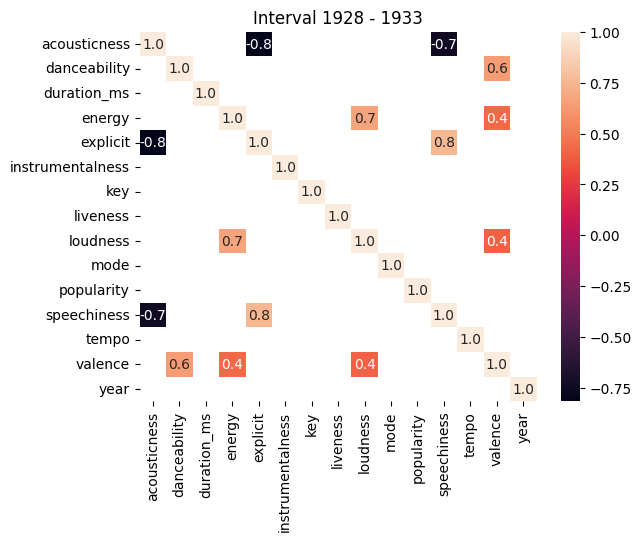

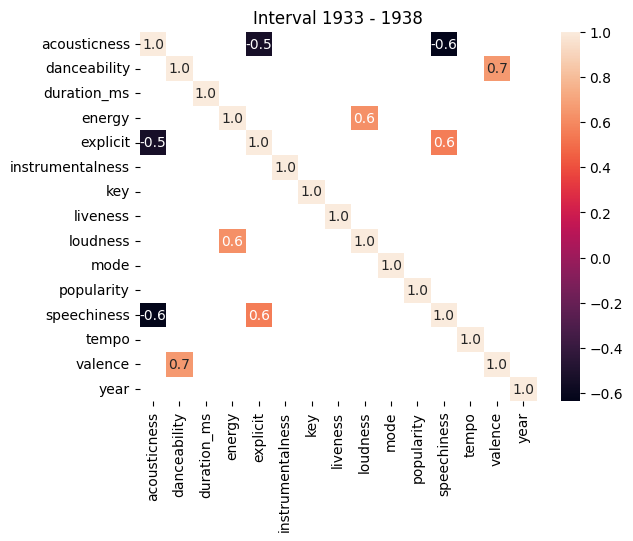

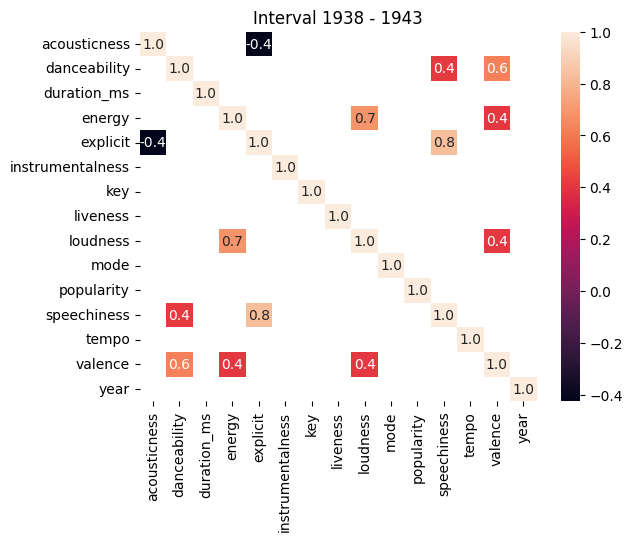

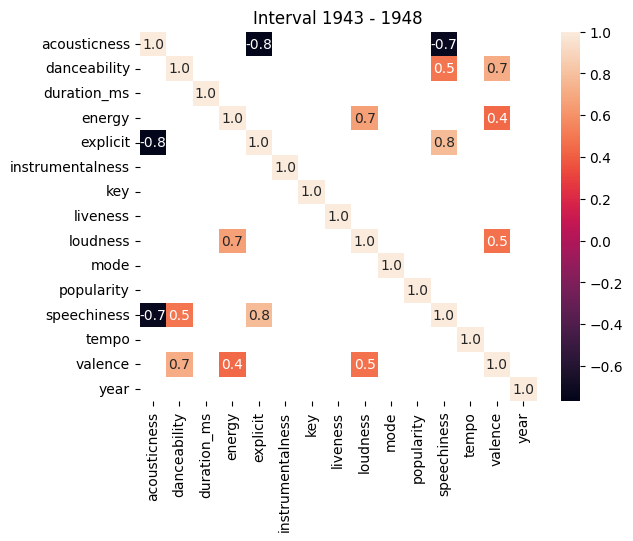

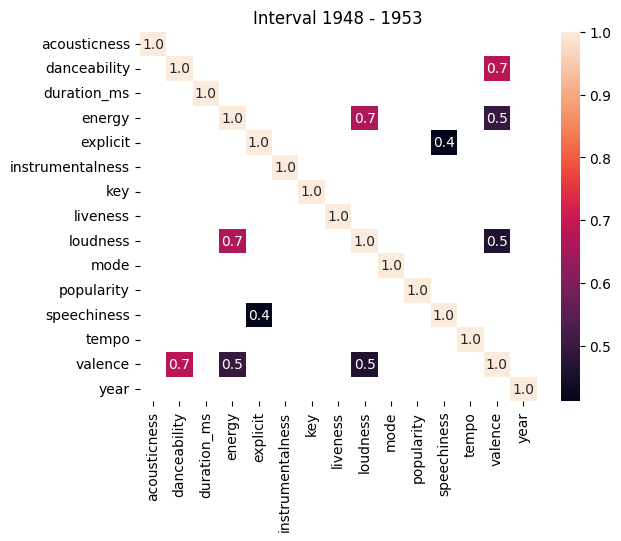

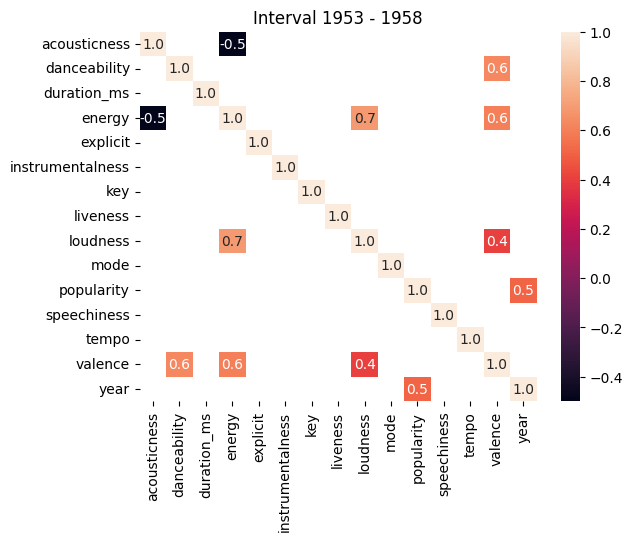

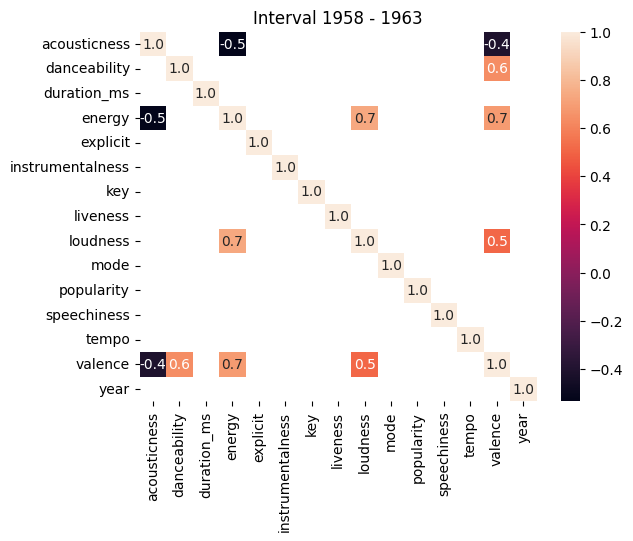

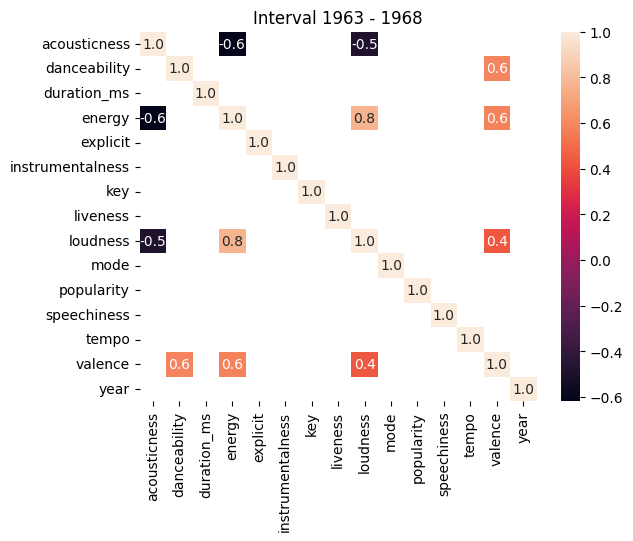

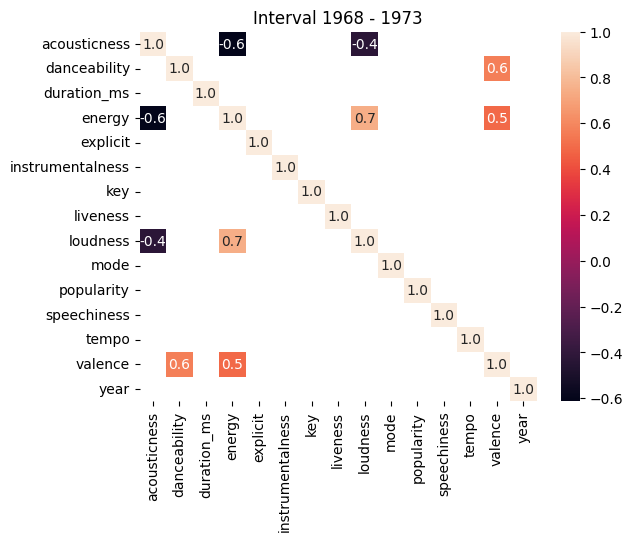

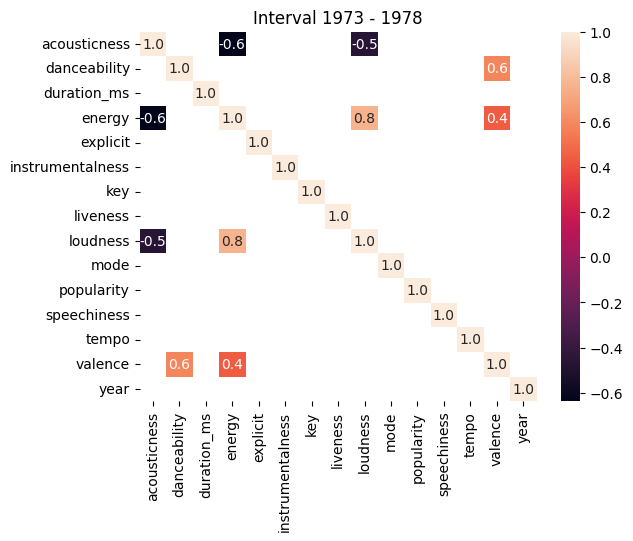

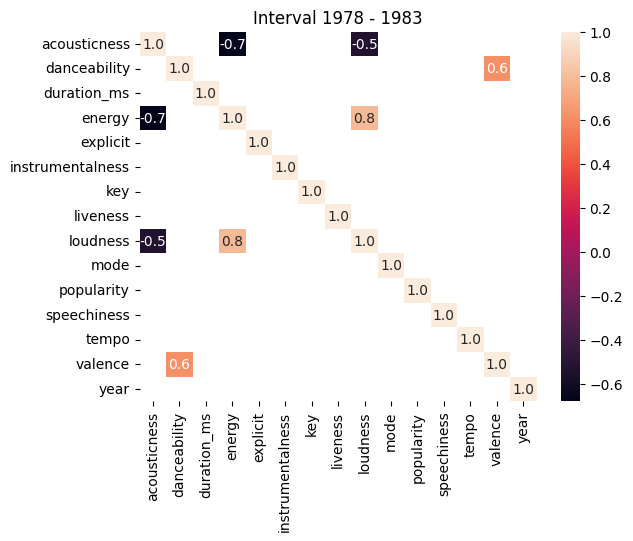

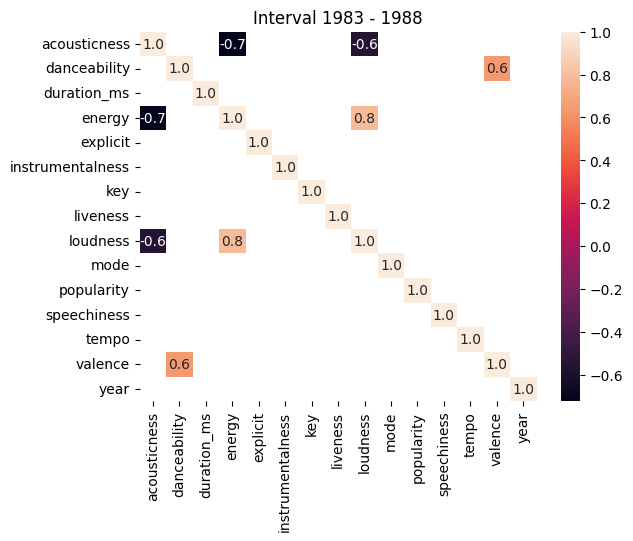

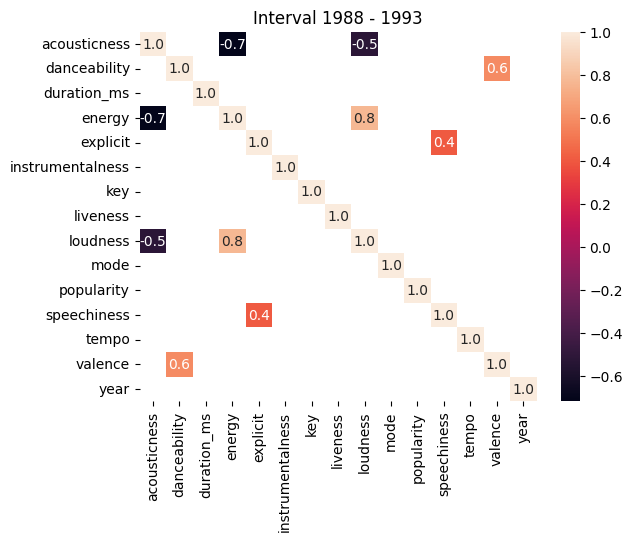

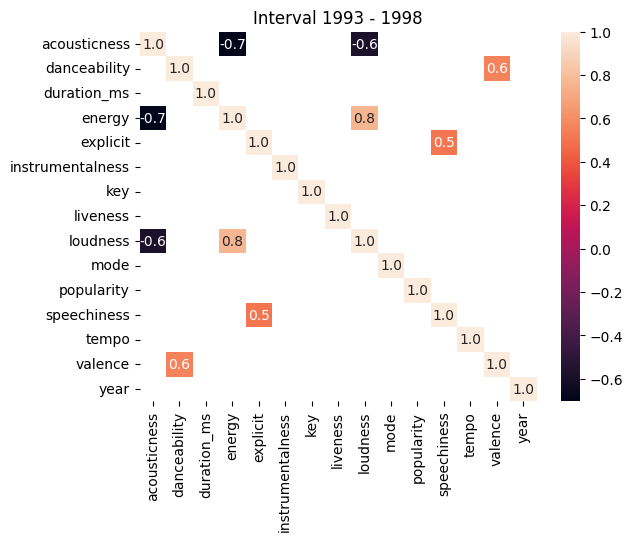

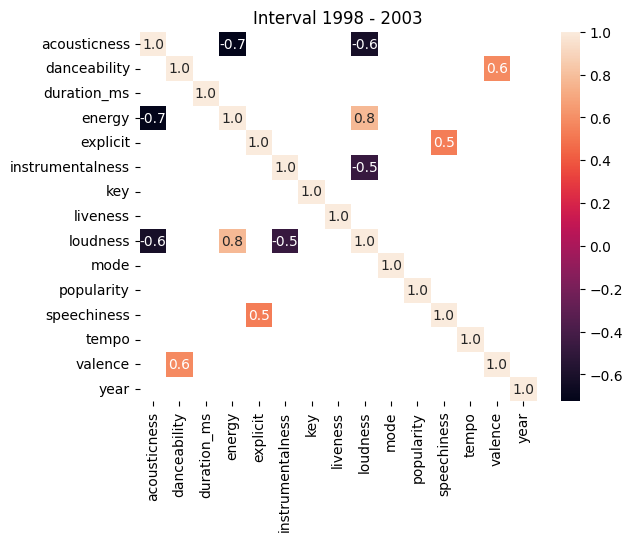

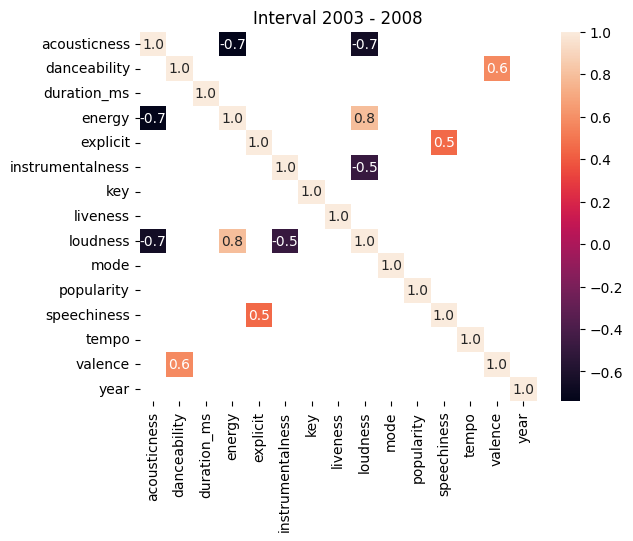

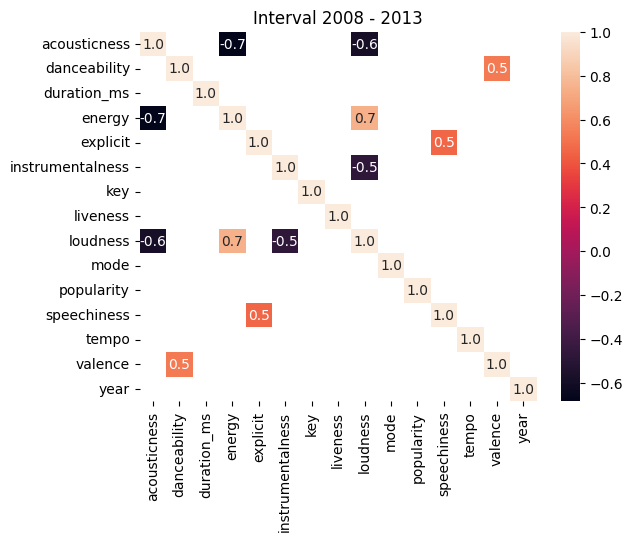

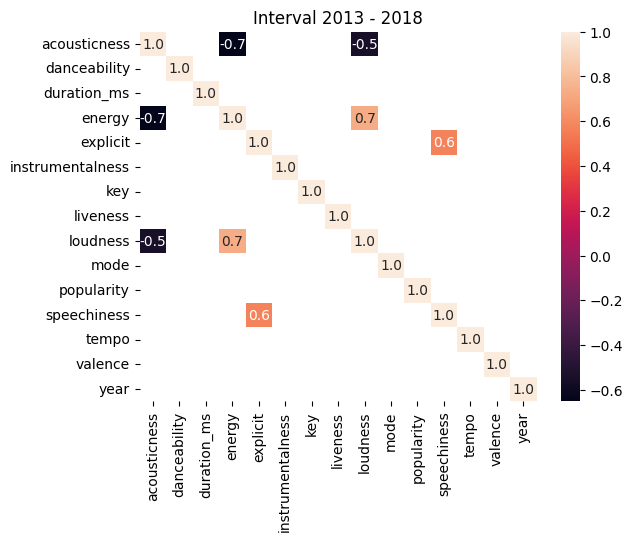

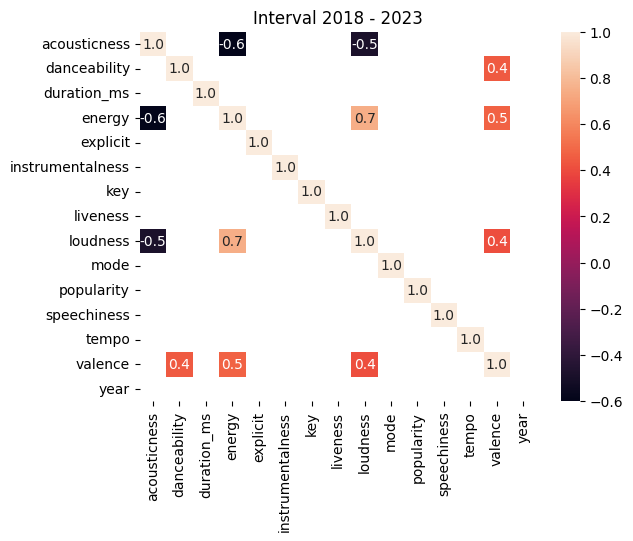

In [6]:
popularity_corr = {}
for i in range(1928, 2020, 5):
    new_interval = df[(X.between(i, i + 5)) & (df['popularity'] < 50)]
    
    popularity_corr[f"{i} - {i+5}"] = new_interval.corr()['popularity']

    correlation_scores = new_interval.corr()
    correlation_scores = correlation_scores[(correlation_scores.iloc[:, 0: 19] >= 0.4) | (correlation_scores.iloc[:, 0: 19] <= -0.4)]
    plt.figure(i)
    plt.title(f'Interval {i} - {i+5}')
    sns.heatmap(correlation_scores, annot=True, fmt=".1f")



This time, even the early intervals don't have features that correlate with popularity. Let's now try a 10 year interval.

C:\Users\user\AppData\Local\Temp\ipykernel_18956\2049756866.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  popularity_corr[f"{i} - {i+10}"] = new_interval.corr()['popularity']
C:\Users\user\AppData\Local\Temp\ipykernel_18956\2049756866.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_scores = new_interval.corr()


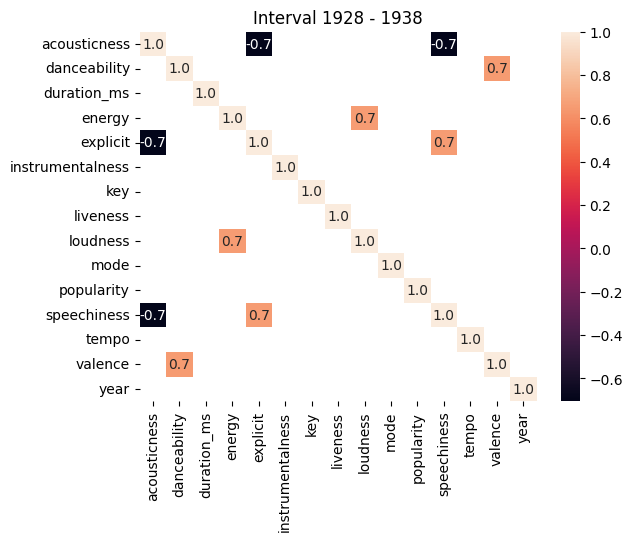

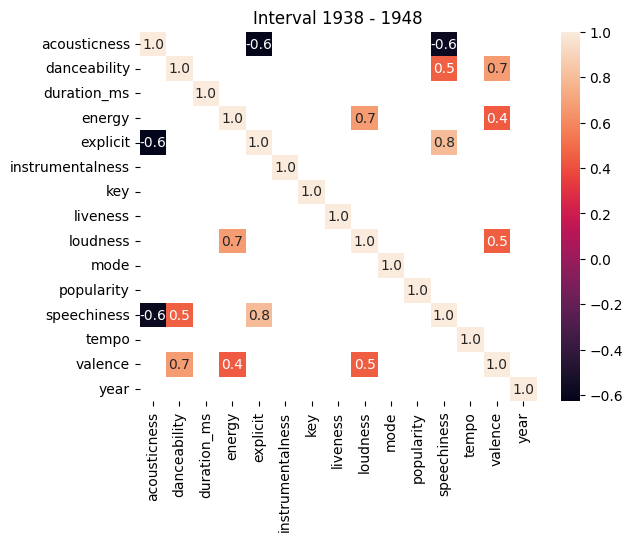

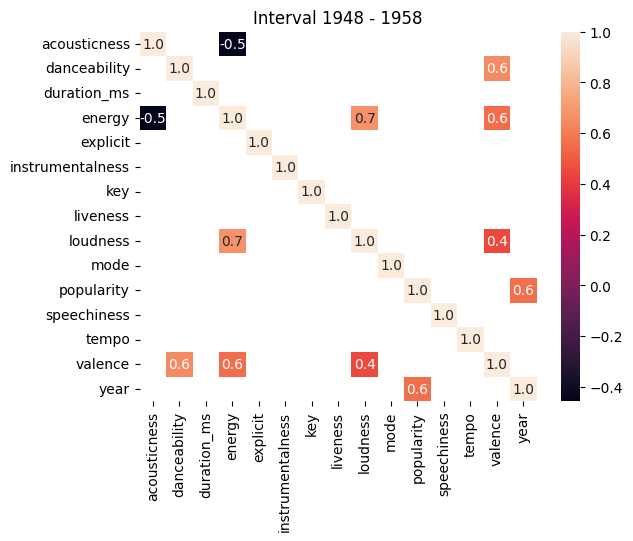

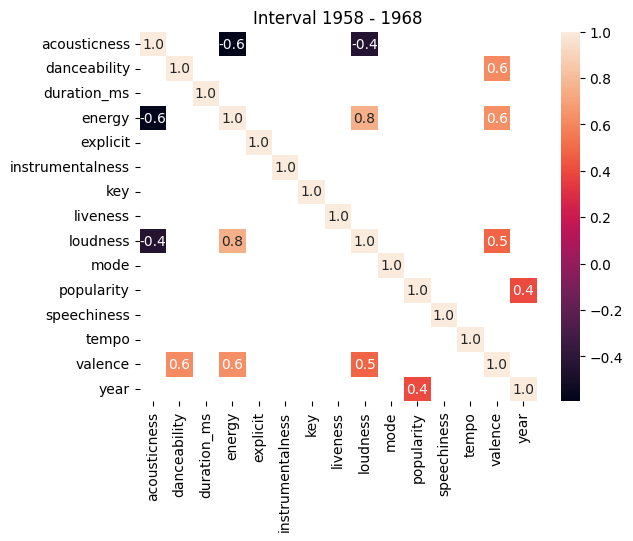

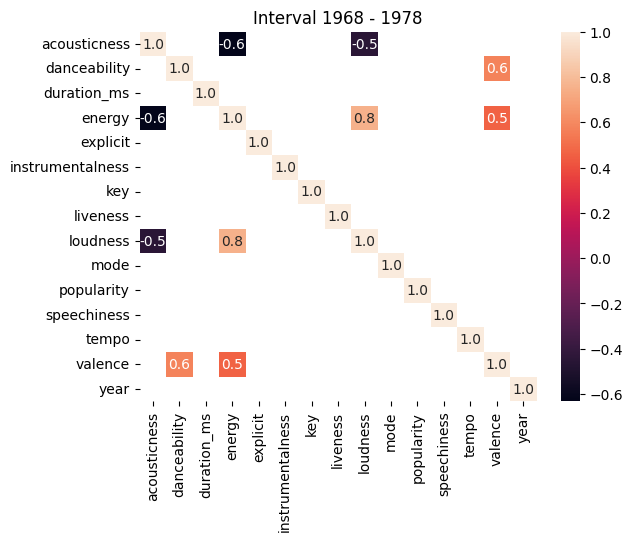

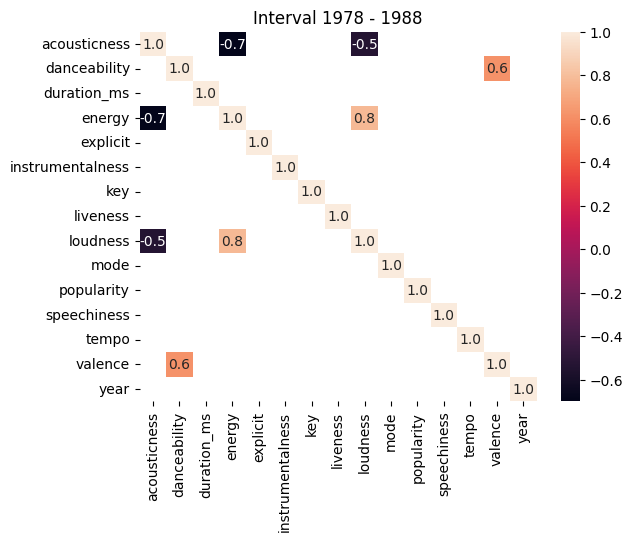

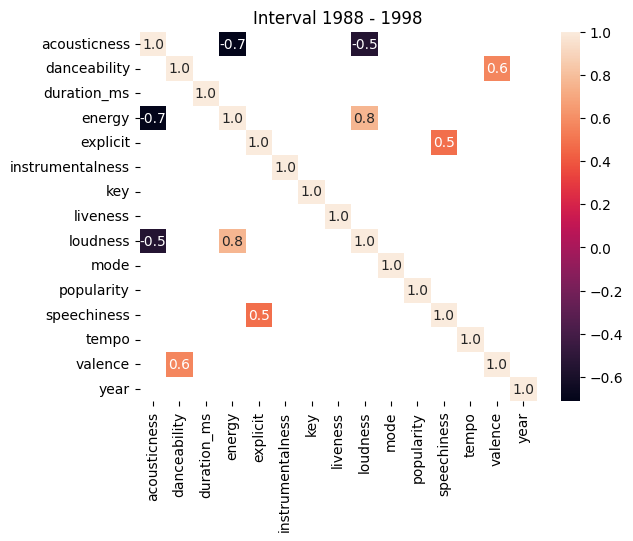

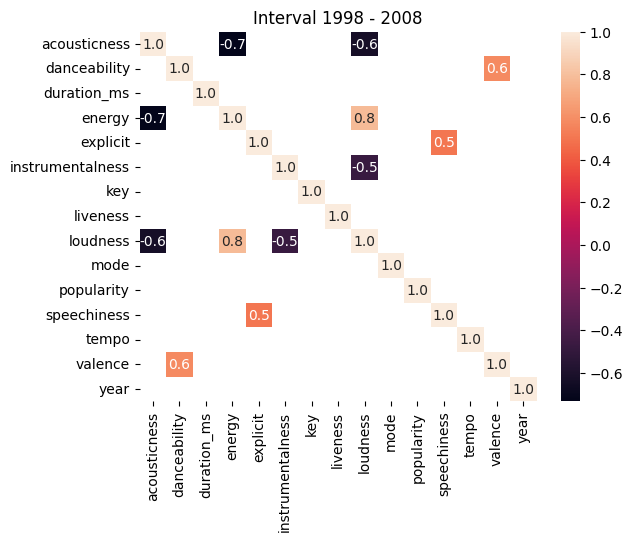

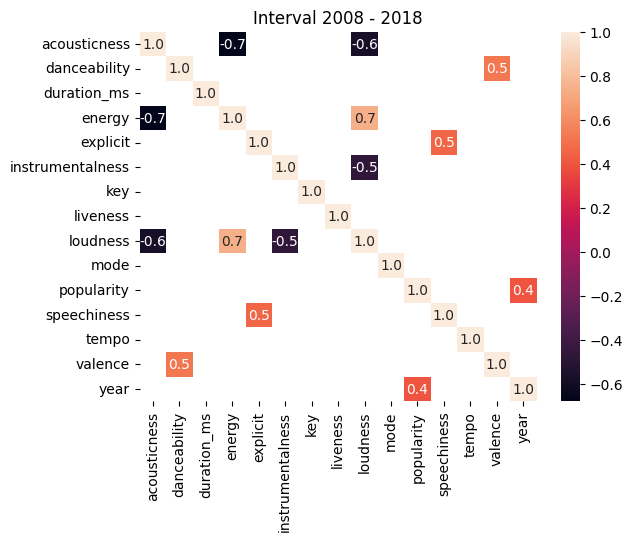

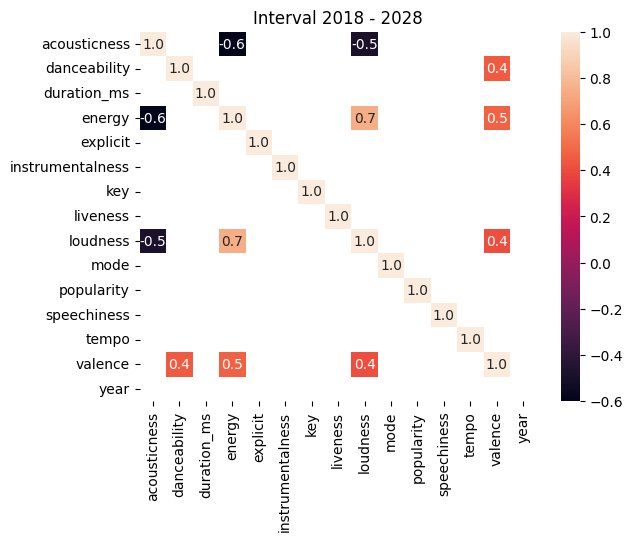

In [10]:
popularity_corr = {}
for i in range(1928, 2020, 10):
    new_interval = df[(X.between(i, i + 10)) & (df['popularity'] < 50)]
    
    popularity_corr[f"{i} - {i+10}"] = new_interval.corr()['popularity']

    correlation_scores = new_interval.corr()
    correlation_scores = correlation_scores[(correlation_scores.iloc[:, 0: 19] >= 0.4) | (correlation_scores.iloc[:, 0: 19] <= -0.4)]
    plt.figure(i)
    plt.title(f'Interval {i} - {i+10}')
    sns.heatmap(correlation_scores, annot=True, fmt=".1f")


We see that for the 10 year interval, only 2 sets of intervals have year correlating with them and the rest have no feature correlating with popularity. So, for both songs that are popular and songs that are not popular, there is are not enoughfeatures correlating with popularity in the intervals.

Let us see if the years will have any featue strongly linearly correlated with it, so we can say if a song has these features, we can prdict the year it was released.

C:\Users\user\AppData\Local\Temp\ipykernel_18956\954181801.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_scores = new_interval.corr()


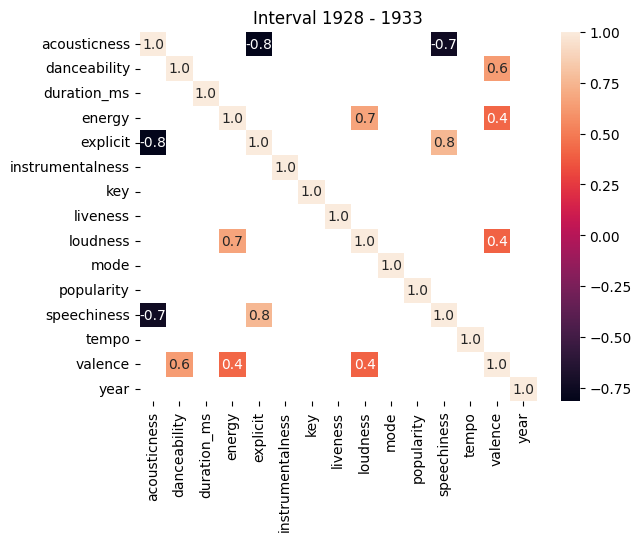

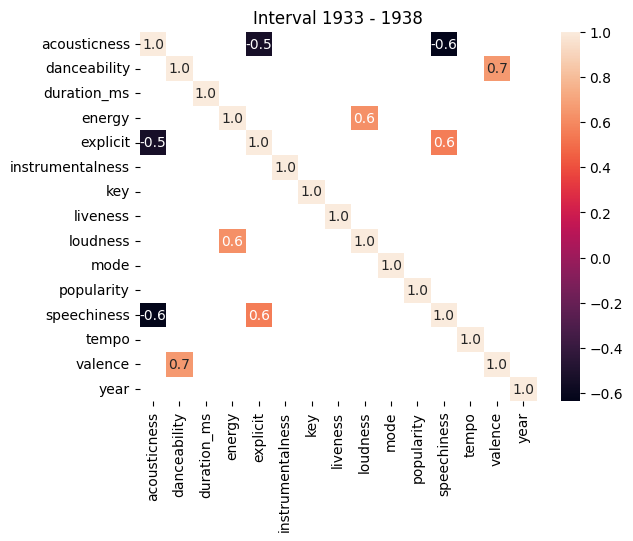

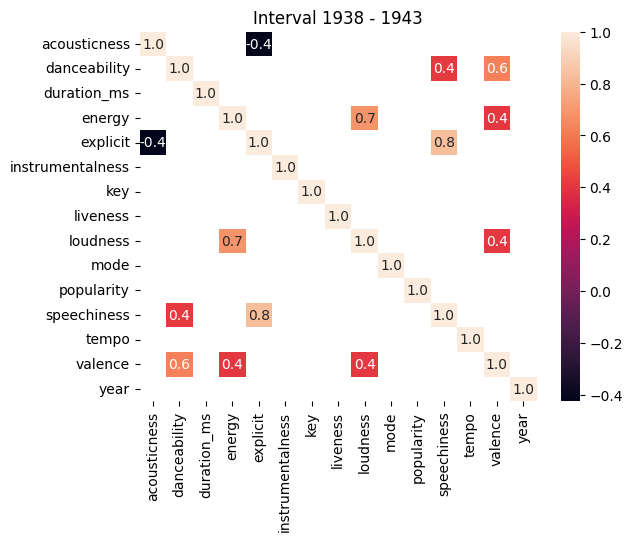

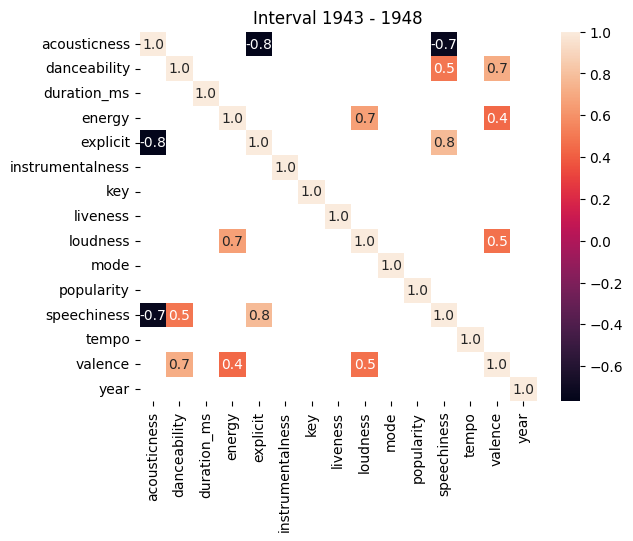

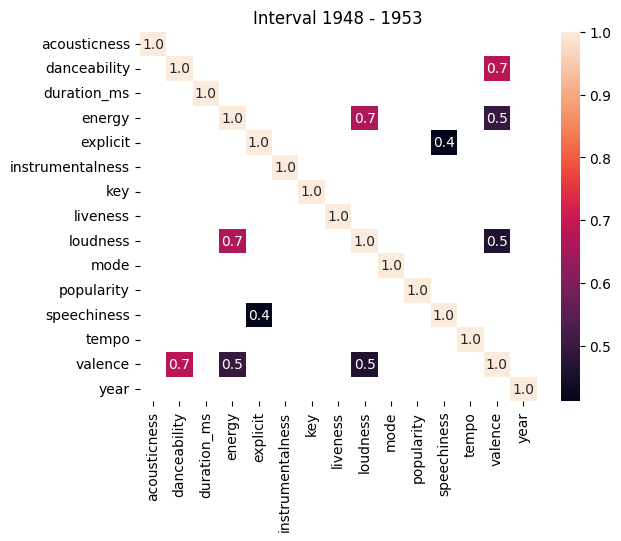

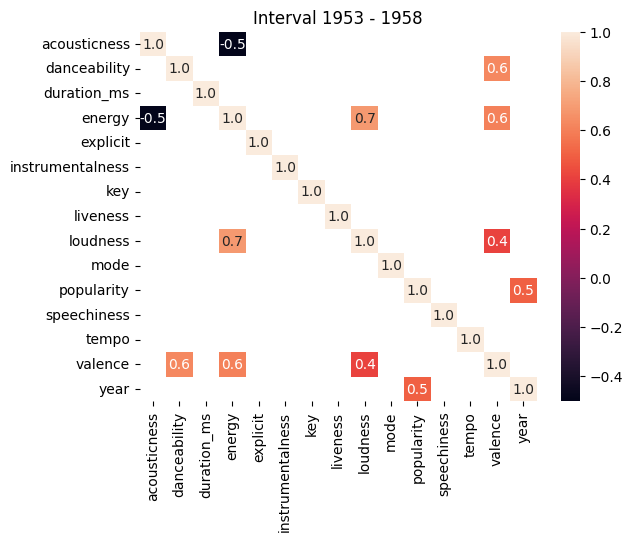

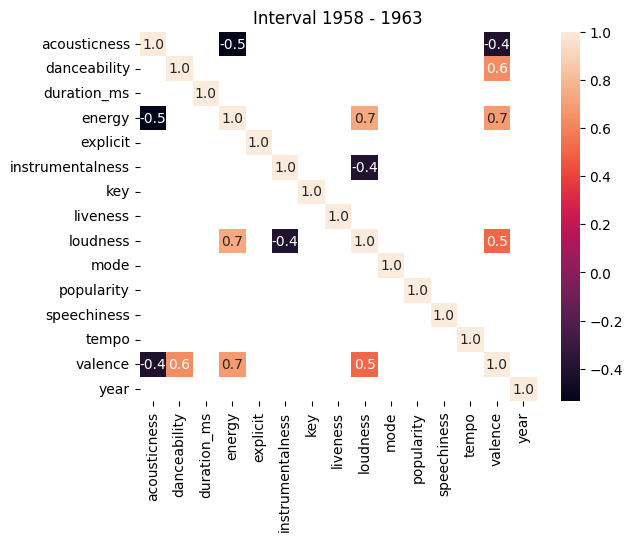

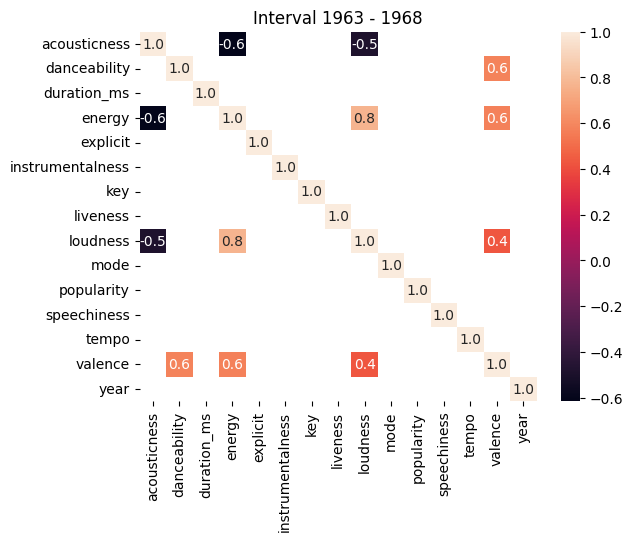

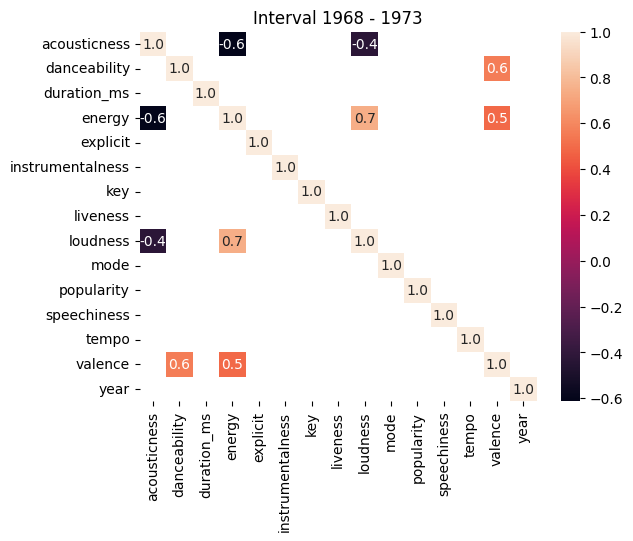

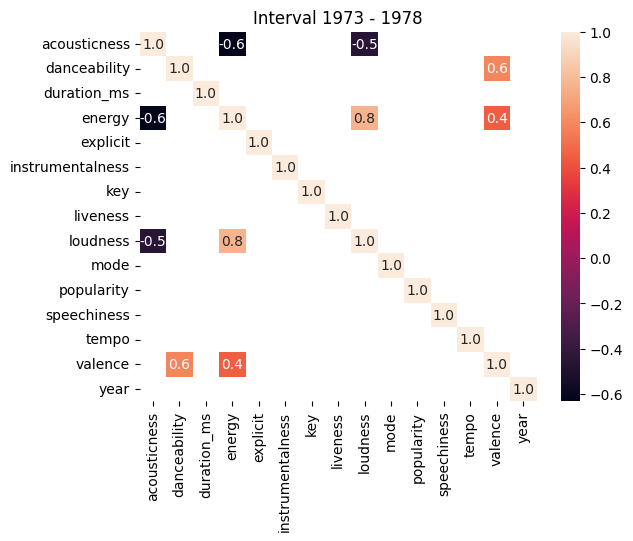

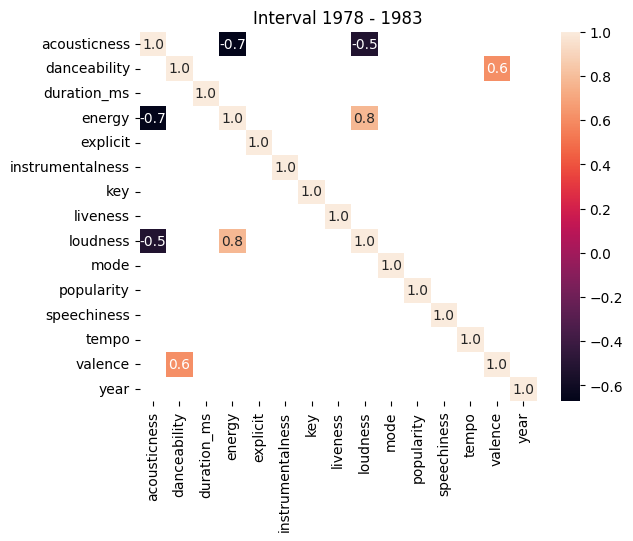

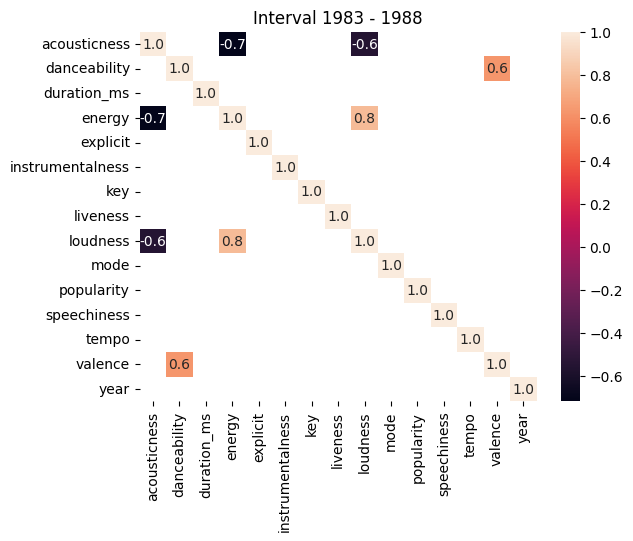

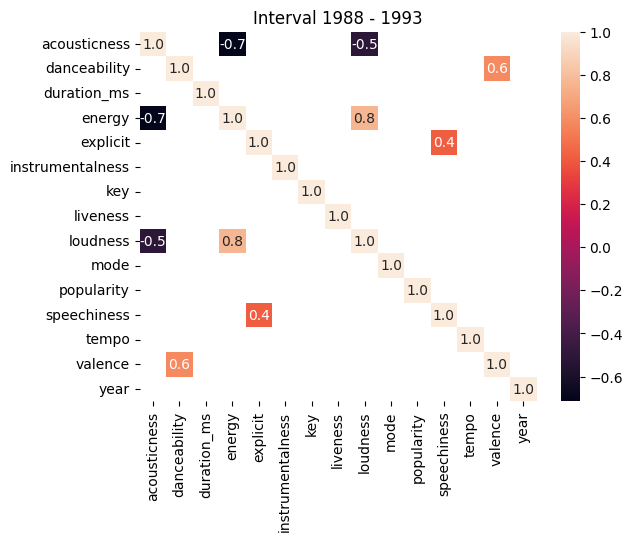

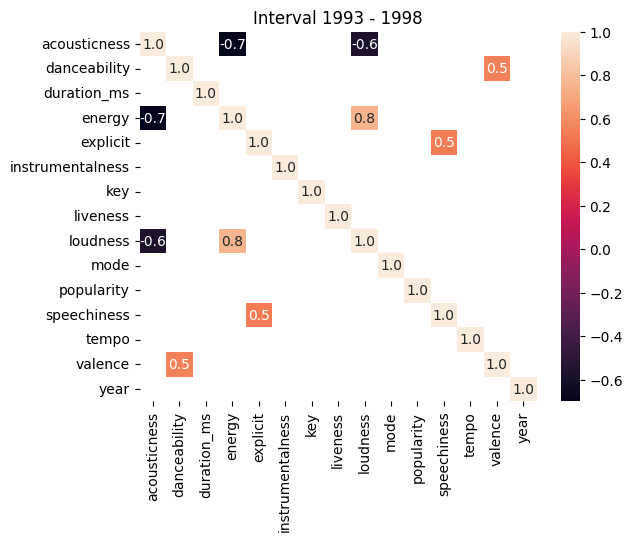

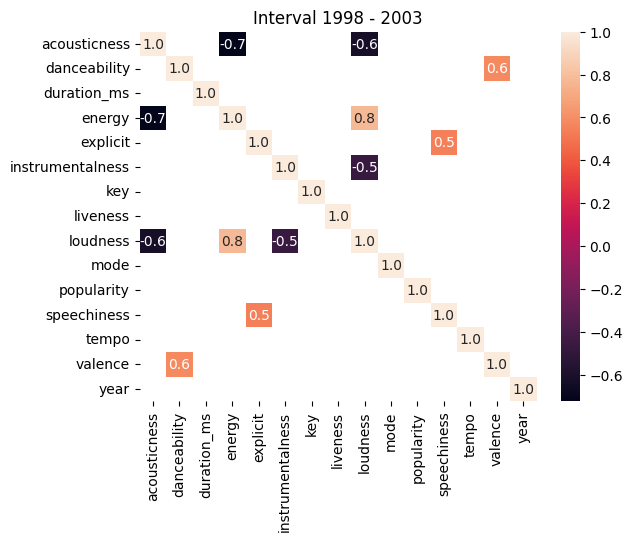

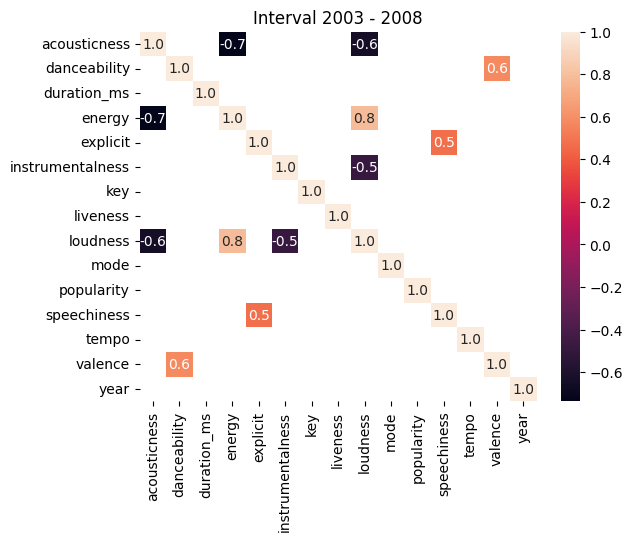

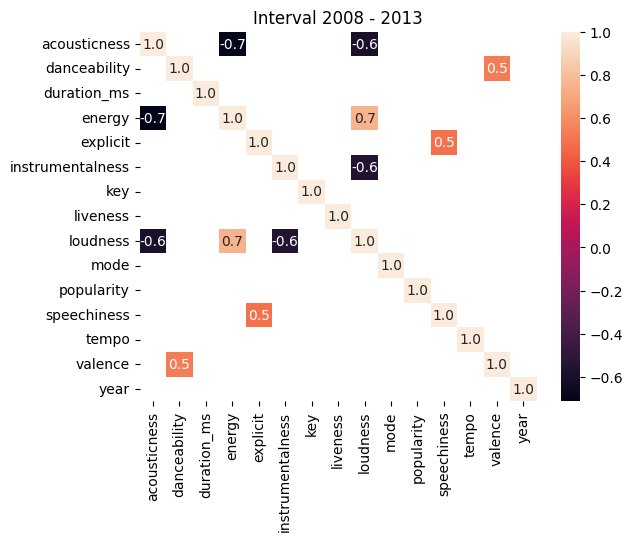

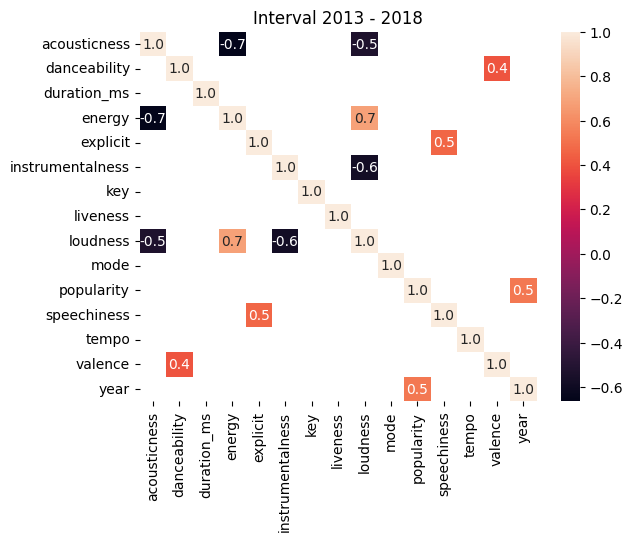

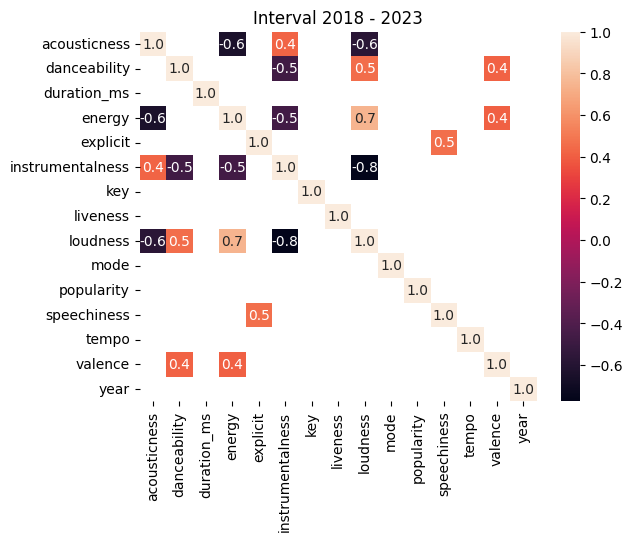

In [11]:
for i in range(1928, 2020, 5):
    new_interval = df[(X.between(i, i + 5))]
    correlation_scores = new_interval.corr()
    correlation_scores = correlation_scores[(correlation_scores.iloc[:, 0: 19] >= 0.4) | (correlation_scores.iloc[:, 0: 19] <= -0.4)]
    plt.figure(i)
    plt.title(f'Interval {i} - {i+5}')
    sns.heatmap(correlation_scores, annot=True, fmt=".1f")
    

The year only correlated with 2 sets of intervals, so we'll try increasing the interval.

C:\Users\user\AppData\Local\Temp\ipykernel_18956\973410214.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_scores = new_interval.corr()


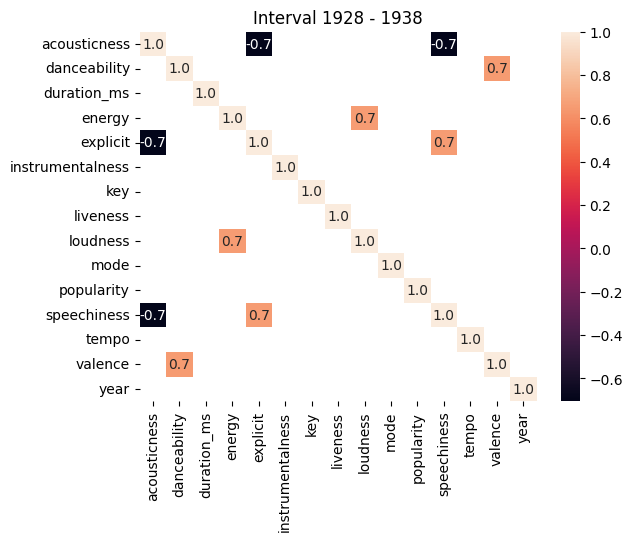

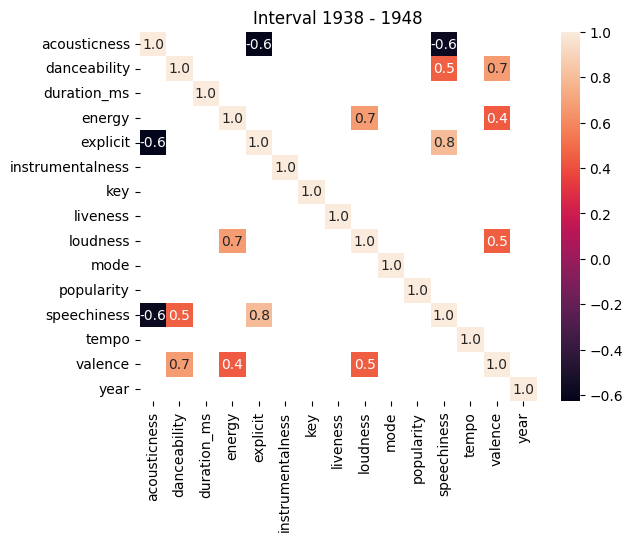

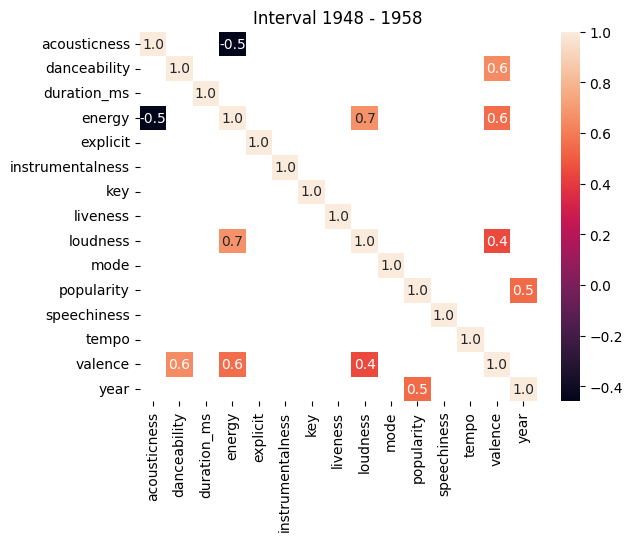

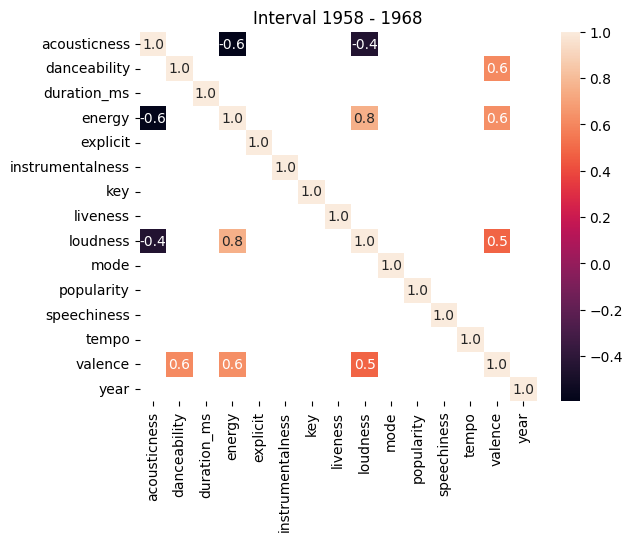

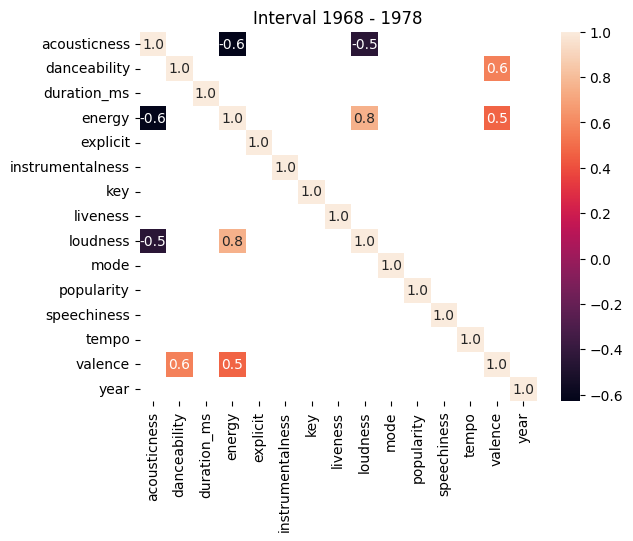

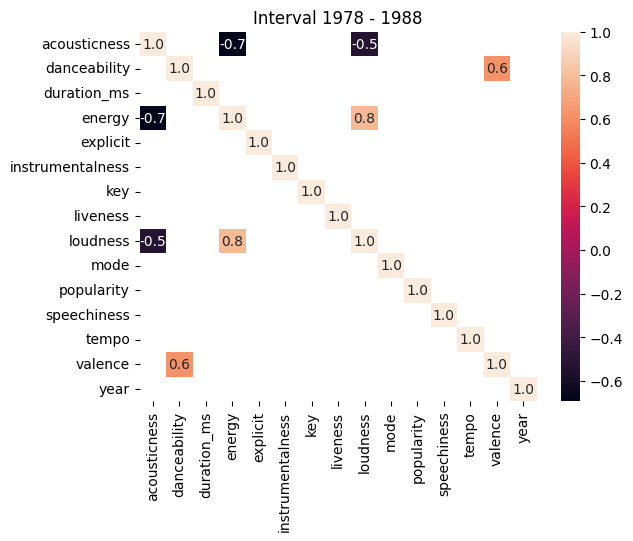

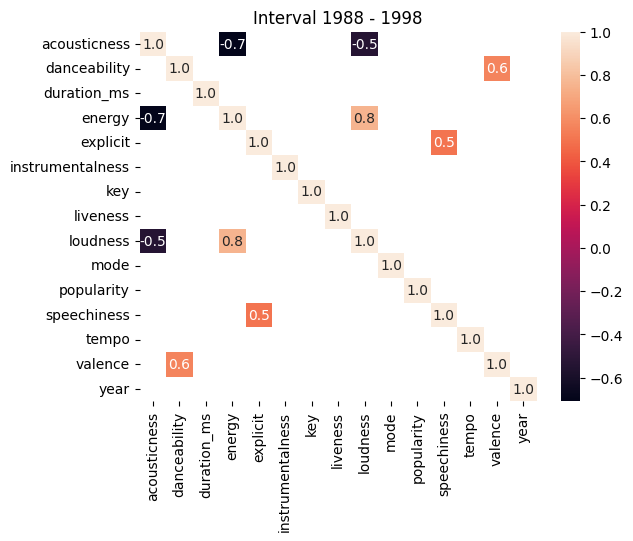

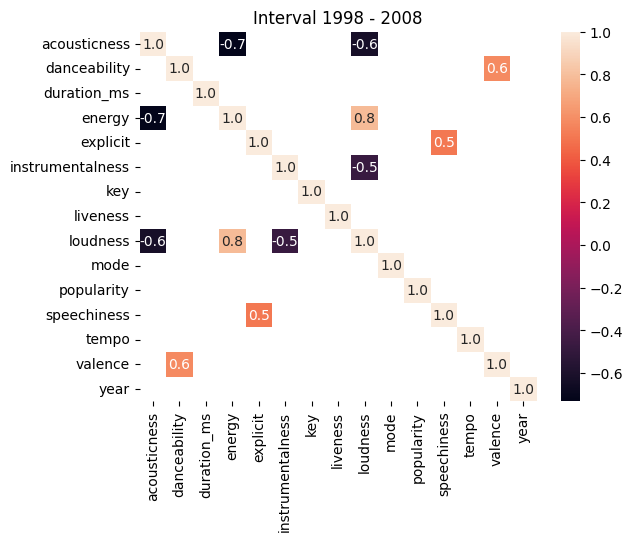

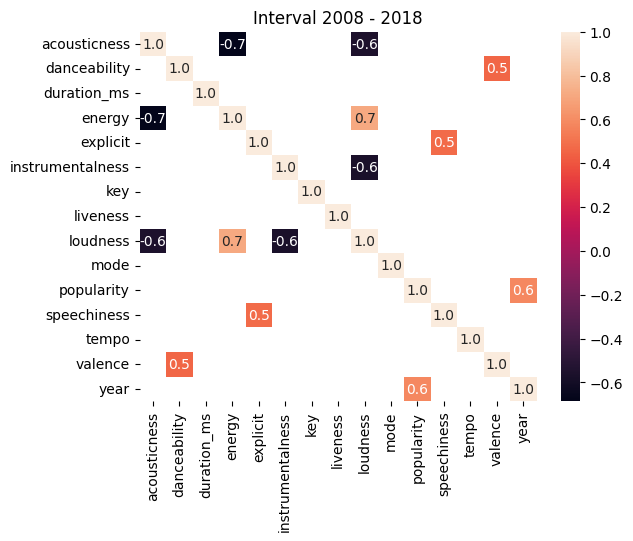

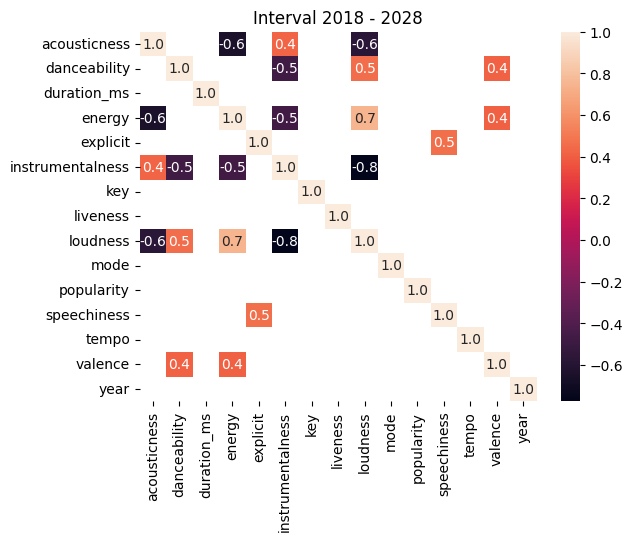

In [12]:
for i in range(1928, 2020, 10):
    new_interval = df[(X.between(i, i + 10))]
    correlation_scores = new_interval.corr()
    correlation_scores = correlation_scores[(correlation_scores.iloc[:, 0: 19] >= 0.4) | (correlation_scores.iloc[:, 0: 19] <= -0.4)]
    plt.figure(i)
    plt.title(f'Interval {i} - {i+10}')
    sns.heatmap(correlation_scores, annot=True, fmt=".1f")
    

We still see similar results after increasing the interval.

Since we see that the year and the popularity are not linearly don't have enough features that they linearly correlate with in the intervals, let us plot their relationships with the other features to inspect if there is any relationship(non-linear)

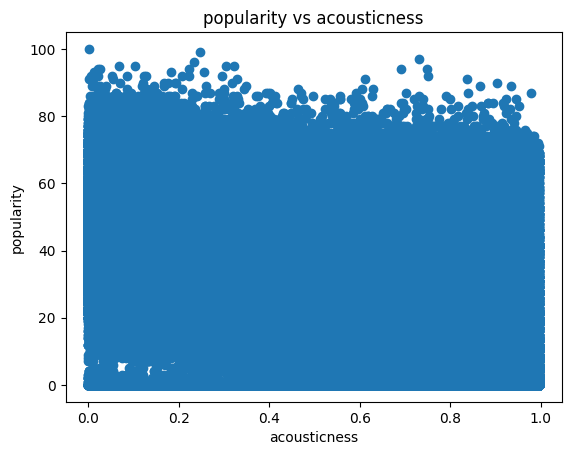

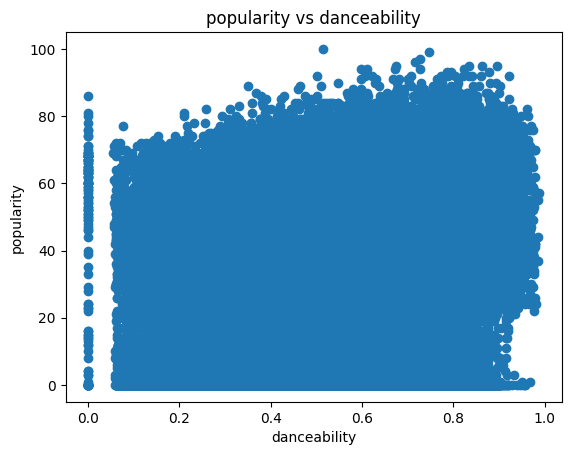

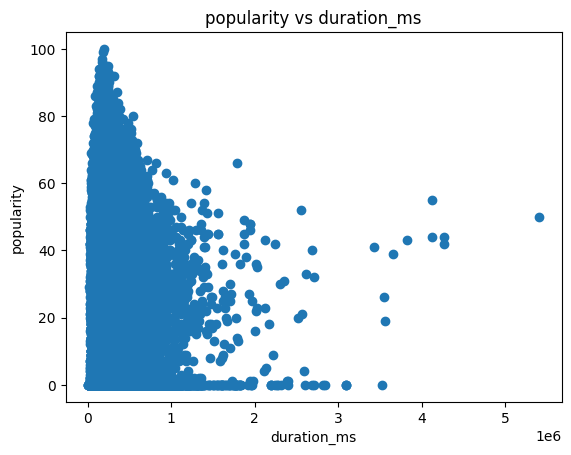

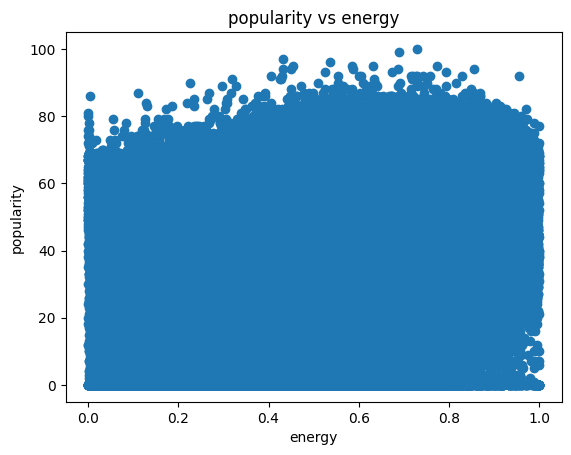

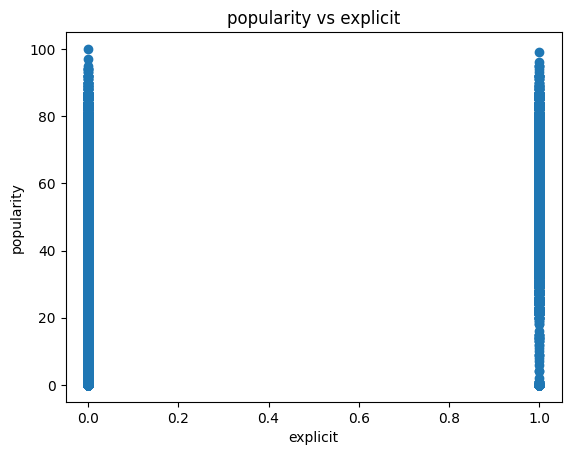

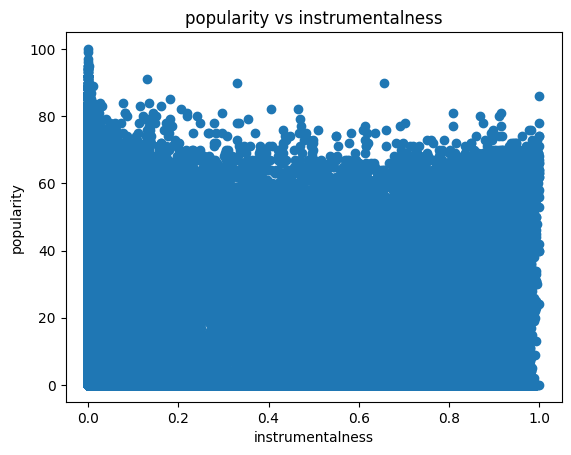

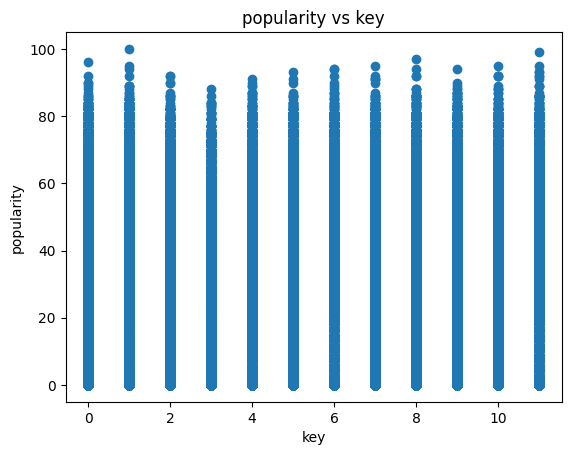

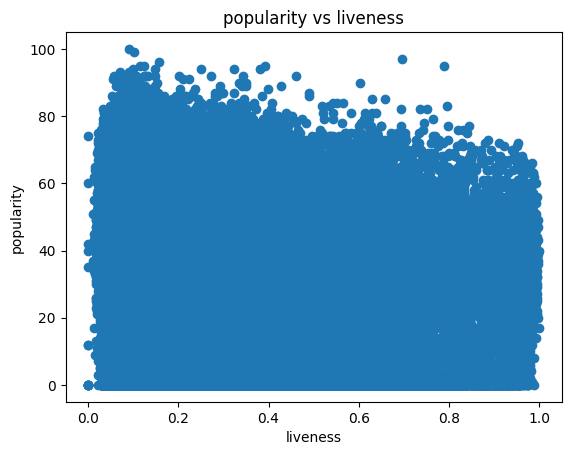

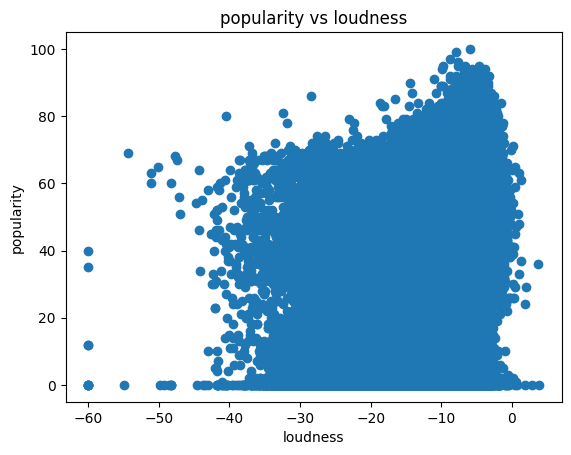

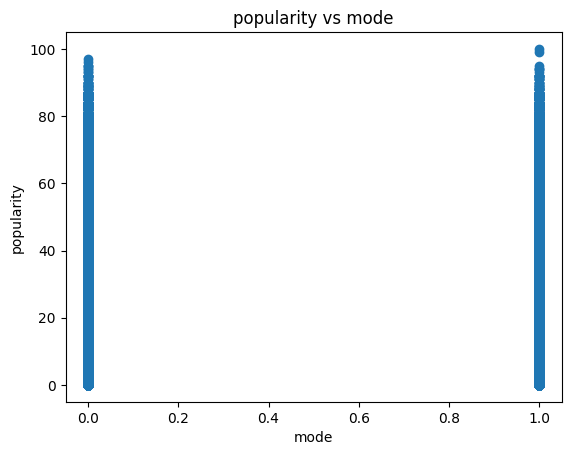

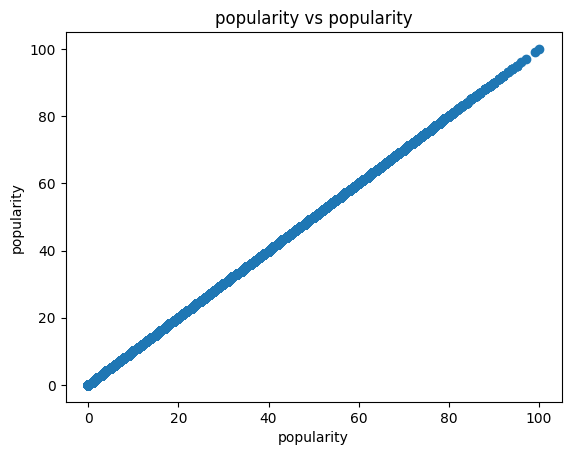

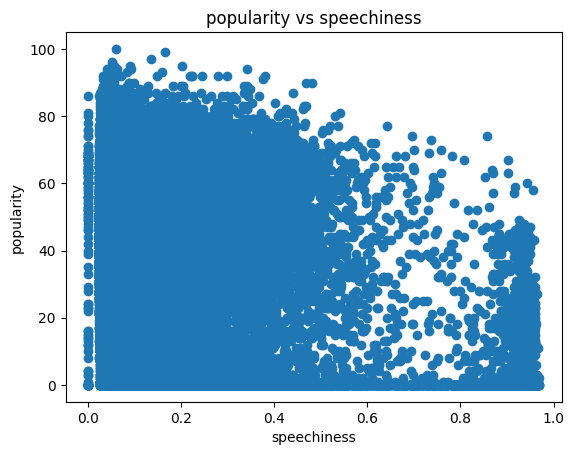

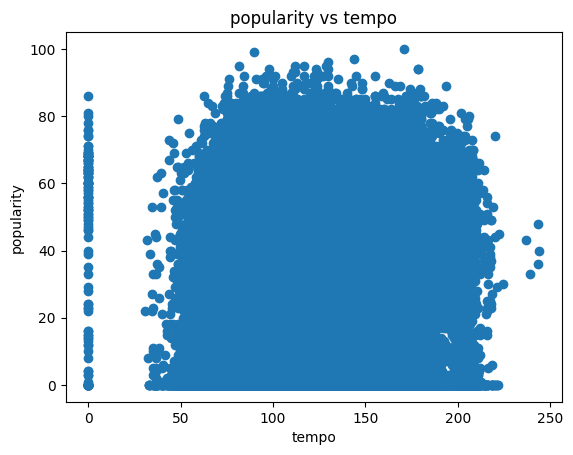

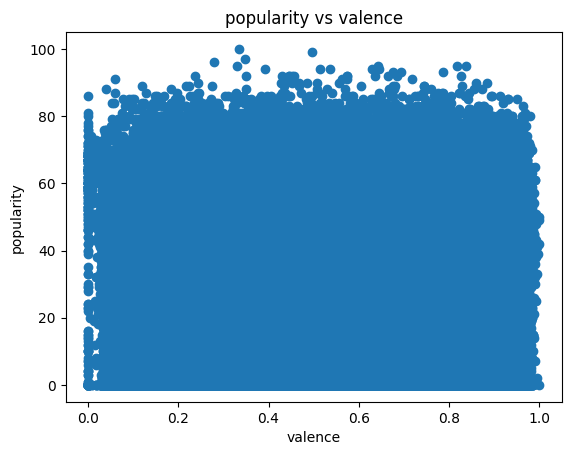

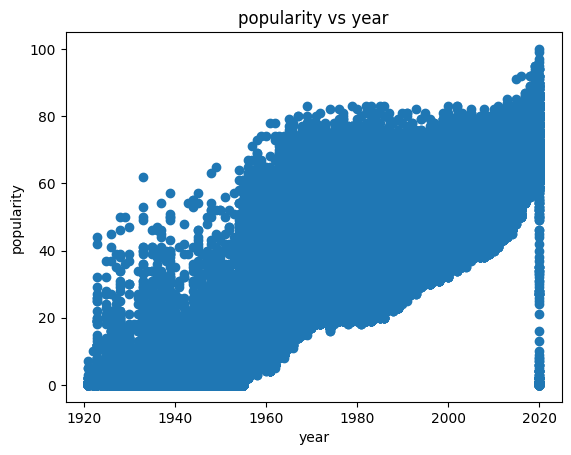

In [23]:
import matplotlib.pyplot as plt

nw_new_interval = df.drop(['artists', 'id', 'name', 'release_date'], axis='columns')
cols = nw_new_interval.columns
for col in cols:
    plt.title(f"popularity vs {col}")
    plt.scatter(nw_new_interval[col], nw_new_interval['popularity'])
    plt.ylabel('popularity')
    plt.xlabel(f'{col}')
    plt.show()


We will now visualize pairwise plots for the year against all other features to check if there is any non-linear correlation between the year and a feature.

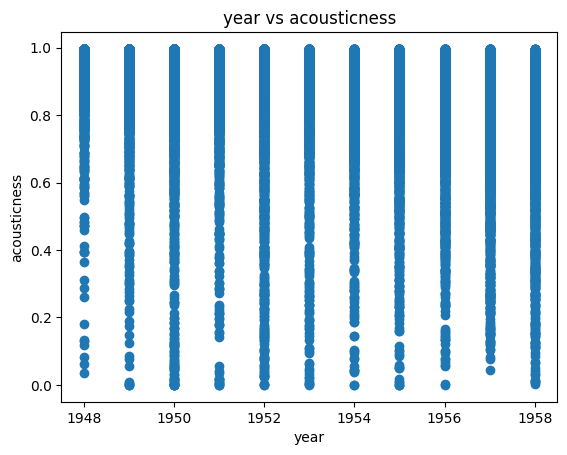

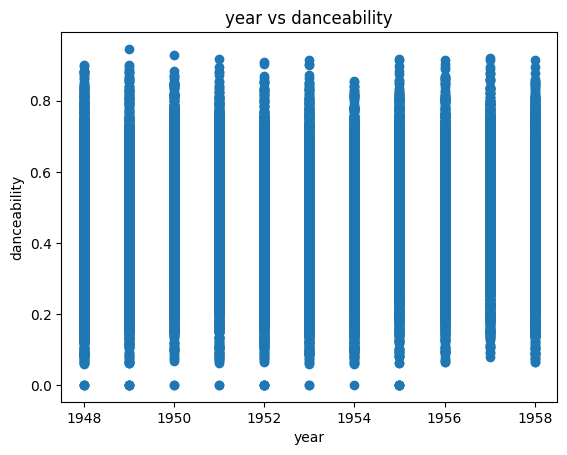

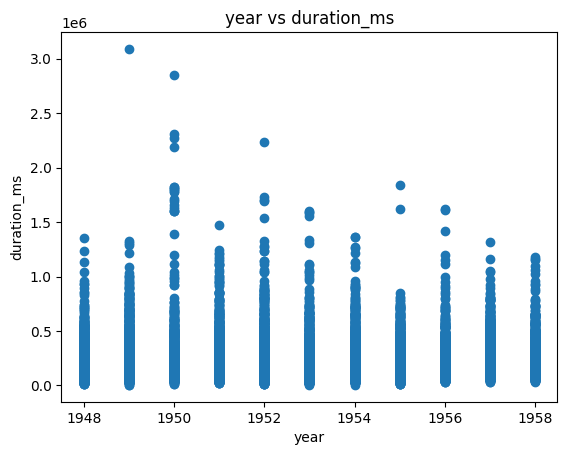

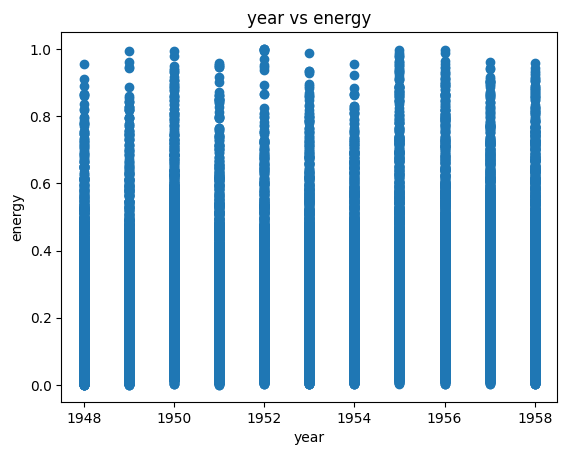

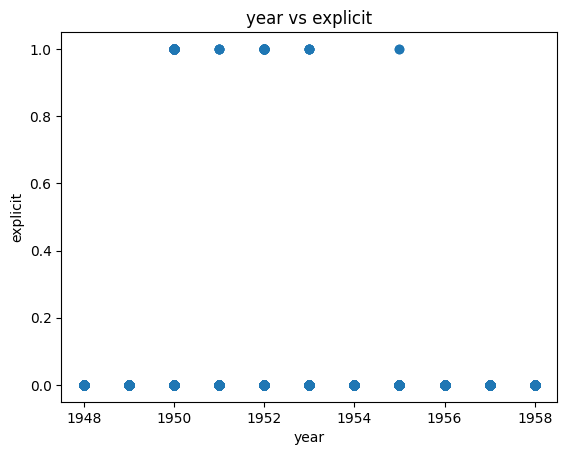

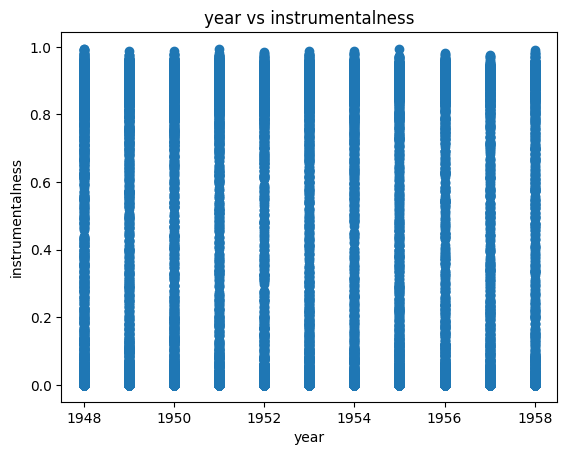

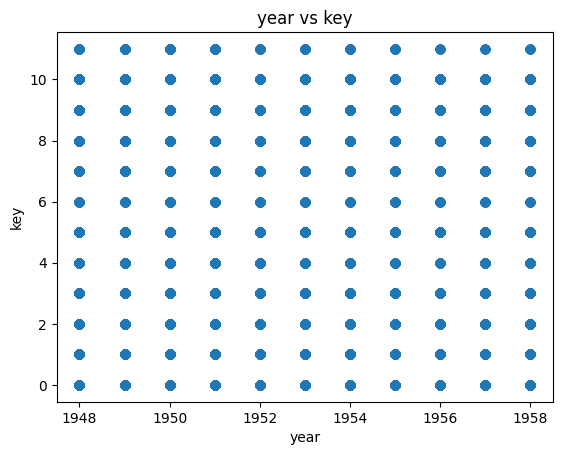

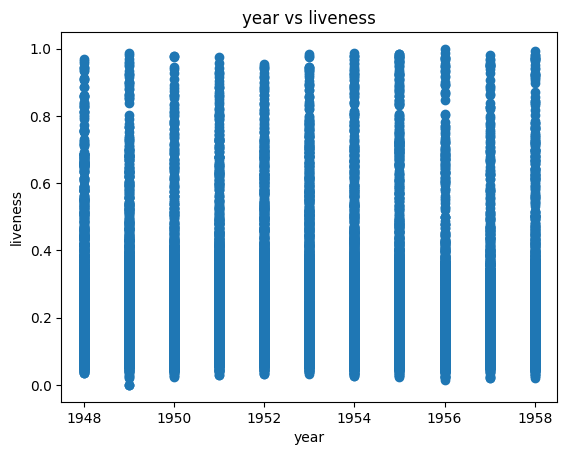

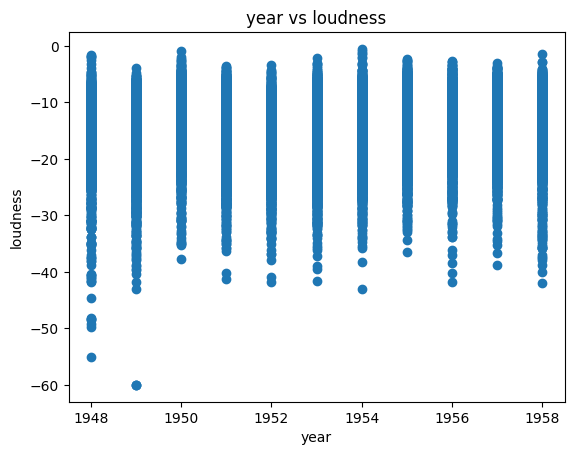

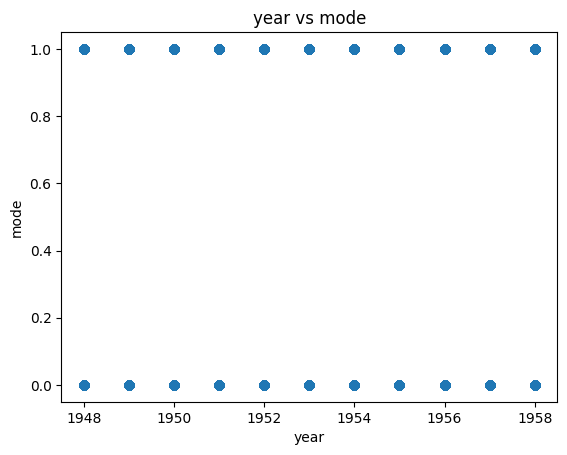

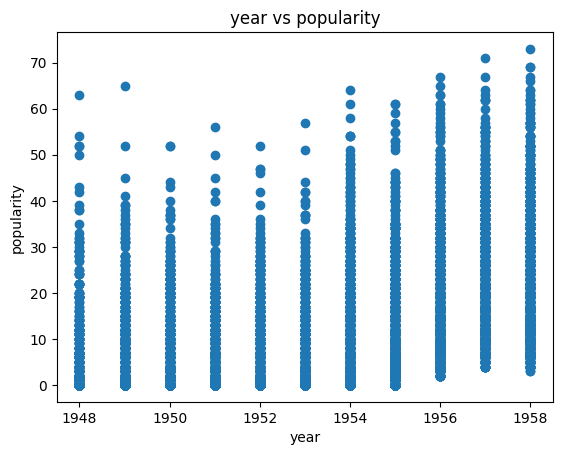

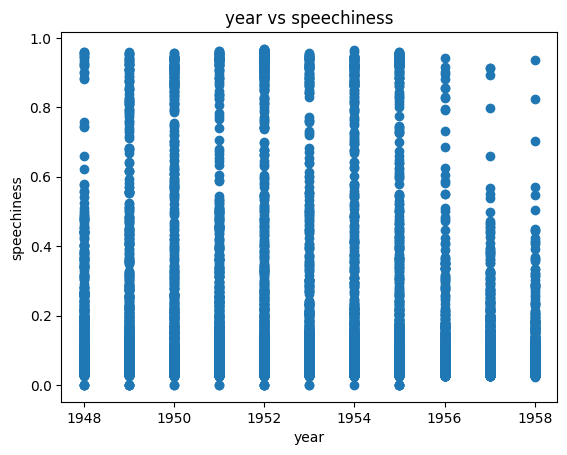

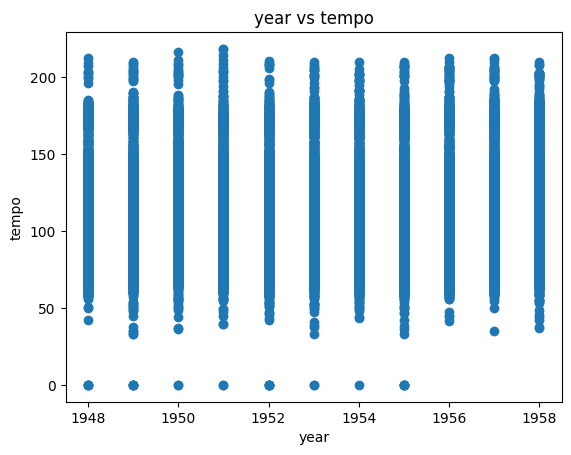

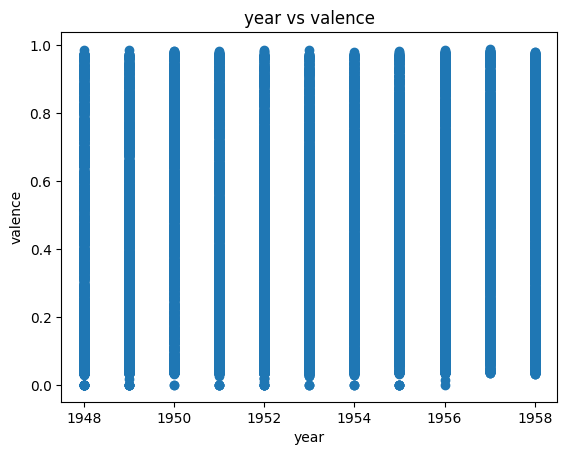

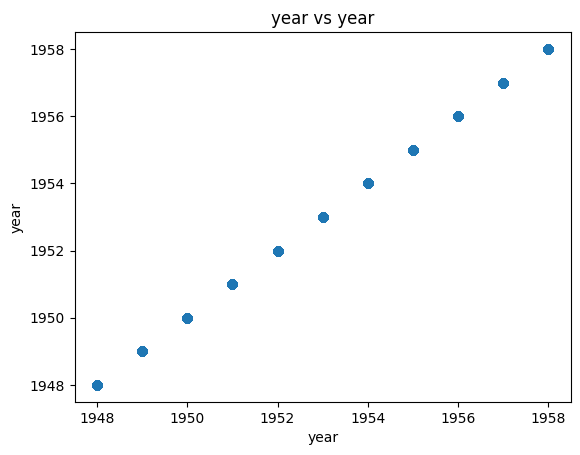

In [103]:
nw_yr_df = df.drop(['artists', 'id', 'name', 'release_date'], axis='columns')
cols = nw_new_interval.columns
for col in cols:
    plt.title(f"year vs {col}")
    plt.scatter(nw_new_interval['year'], nw_new_interval[col])
    plt.xlabel('year')
    plt.ylabel(f'{col}')
    plt.show()

# Multiple Linear Regression to Predict Popularity

import modules

In [13]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
import scikitplot as skplt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


prepare data to used for prediction

In [12]:
df = pd.read_csv('spotify_data.csv')

# get the target column
pop = df['popularity']

# drop columns that are non numeric in nature
lin_df = df.drop(['artists', 'id', 'name', 'release_date', 'popularity' ], axis='columns')

# normalizes the predictors so they range from 0 to 1,
# since the units of each column vary and the differences might
# influence the model. 
feature_names = lin_df.columns
lin_df = lin_df / lin_df.max()

# separate the data for testing and training
X_train, X_test, y_train, y_test = train_test_split(lin_df, pop, test_size=0.30)


## Build Lasso Regression model

In [14]:
# build model for lasso regression and fit the model on the train data
lasso_model = Lasso().fit(X_train, y_train)


## Predictions with Lasso Regression 

R-squared: 0.36046492328541035
 Root mean squared error: 17.26414400325837


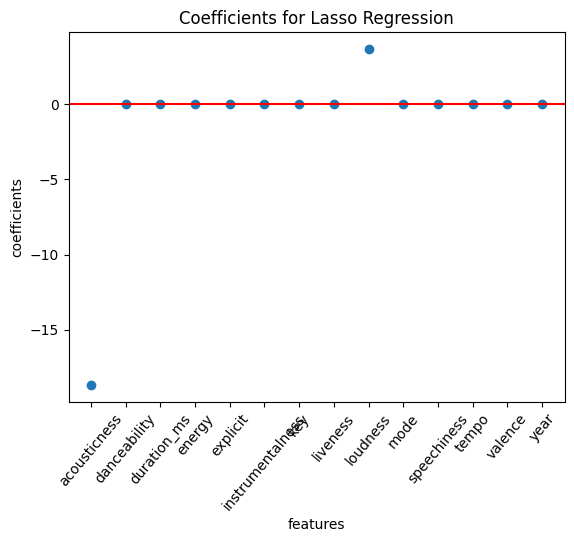

In [16]:
multiple_coefs = lasso_model.coef_ 

# get mse and r squared for predictions on test data
lasso_test_predictions = lasso_model.predict(X_test)
print(f"R-squared: {r2_score(y_test, lasso_test_predictions)}")
print(f"Root mean squared error: {np.sqrt(mean_squared_error(y_test,lasso_test_predictions))}")

# Plotting
plt.scatter(range(len(multiple_coefs)), multiple_coefs)
plt.axhline(0, color='r', linestyle='solid')
plt.xticks(range(len(feature_names)),feature_names,rotation=50)
plt.title("Coefficients for Lasso Regression")
plt.ylabel("coefficients")
plt.xlabel("features")
plt.show()


From the above graph, we denote that only the features acousticness and loudness have an impact on the ppopularity, with acousticness having a higher impact since it has a much higher coefficient score loudness. But even with this effect the featues had, the model built did not have a sufficient enough score for accuracy, with its r-squared at 0.36.


## Build Ridge Regression model

In [17]:
# build model and fit model to data
ridge_model = Ridge().fit(X_train, y_train)


## Predictions with Ridge Regression 

R-squared: 0.781570202937127
Root mean squared error: 10.08948052463319


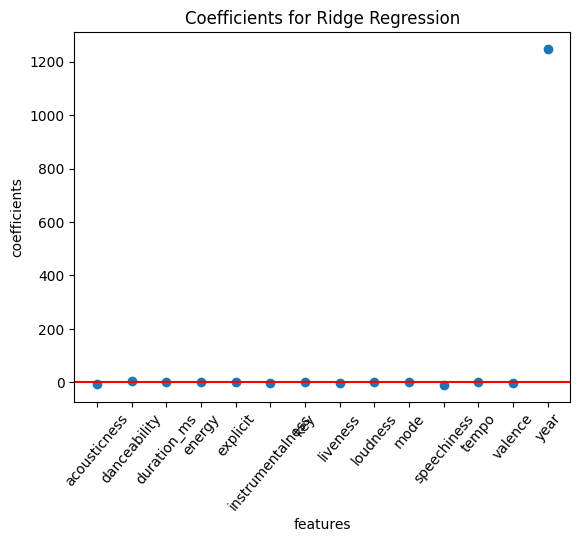

In [18]:
multiple_coefs = ridge_model.coef_ 

# get mse and r squared for predictions on train data
ridge_test_predictions = ridge_model.predict(X_test)
print(f"R-squared: {r2_score(y_test, ridge_test_predictions)}")
print(f"Root mean squared error: {np.sqrt(mean_squared_error(y_test,ridge_test_predictions))}")

# Plotting
plt.scatter(range(len(multiple_coefs)), multiple_coefs)
plt.axhline(0, color='r', linestyle='solid')
plt.xticks(range(len(feature_names)),feature_names,rotation=50)
plt.title("Coefficients for Ridge Regression")
plt.ylabel("coefficients")
plt.xlabel("features")
plt.show()

From the above graph, we denote that the only the feature year  has an impact on popularity when l2 normaization is applied, and not only does the year have an impact, but the impact is very high, and this shows as we have the R-squared as 0.78.


## Build Elasticnet model

In [19]:
# build model and fit model to data
elastic_model = ElasticNet().fit(X_train, y_train)

## Predictions with Lasso Regression 

R-squared: 0.26090050567540446
Root mean squared error: 18.55941648849681


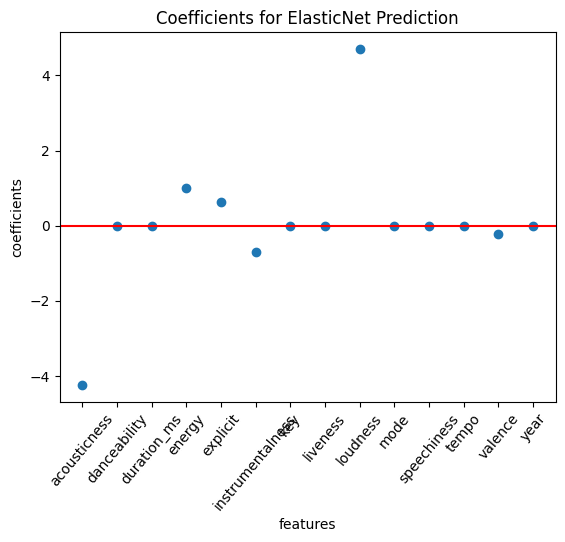

In [21]:
multiple_coefs = elastic_model.coef_ 

# get mse and r squared for predictions on test data
elastic_test_predictions = elastic_model.predict(X_test)
print(f"R-squared: {r2_score(y_test, elastic_test_predictions)}")
print(f"Root mean squared error: {np.sqrt(mean_squared_error(y_test,elastic_test_predictions))}")

# Plotting
plt.scatter(range(len(multiple_coefs)), multiple_coefs)
plt.axhline(0, color='r', linestyle='solid')
plt.xticks(range(len(feature_names)),feature_names,rotation=50)
plt.title("Coefficients for ElasticNet Prediction")
plt.ylabel("coefficients")
plt.xlabel("features")
plt.show()